In [1]:
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC_guess import *
import time

# Test Koopman operater in numpy

In [9]:
file_name = 'newnew_real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
x = np.array([.1,.1,0.3])
nonlinear_x = x
u = np.array([0.5,0.3])
lifted_x = operater.encode(x)
for i in range(5):
    next_lifted_x = operater.linear(lifted_x,u)
    nonlinear_x = discrete_nonlinear(nonlinear_x,u,0.1)
next_x = operater.decode(next_lifted_x)
print(next_x,nonlinear_x)
operater.property()

[0.13792453 0.11252797 0.32958328] [[0.33376368 0.18798932 0.45      ]]
The system is uncontrollable, the rank of the controllability matrix is 7.


In [11]:
file_name = 'newnew_real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
A,B = operater.linear_matrix()
print(A)

[[ 0.99897265 -0.          0.          0.          0.         -0.
   0.          0.         -0.         -0.         -0.        ]
 [ 0.          0.9995147  -0.          0.          0.          0.
   0.         -0.         -0.          0.          0.        ]
 [-0.          0.          0.9998891   0.         -0.         -0.
  -0.          0.         -0.          0.          0.        ]
 [-0.          0.          0.          0.9996904  -0.         -0.
   0.          0.         -0.          0.          0.        ]
 [-0.          0.         -0.          0.          0.99981683  0.
   0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.          1.0001699
  -0.          0.         -0.         -0.          0.        ]
 [ 0.         -0.         -0.          0.         -0.         -0.
   0.7279616  -0.          0.         -0.          0.        ]
 [-0.         -0.          0.          0.          0.         -0.
  -0.          0.7311690

In [ ]:
Ae = np.linalg.eigvals(A)
print(Ae)

# Test MPC function

In [1]:
# get augmented matrices
A,B = operater.linear_matrix()
Q = np.diag(np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.]))
R = np.diag(np.array([1.,2.]))
rho = 1.
Gamma,Theta,Qbig,H = get_Augmented_Matrix(A,B,Q,R,rho,3,2)
print(Gamma.shape)
print(Theta.shape)
print(Qbig.shape)
print(H.shape)

NameError: name 'operater' is not defined

In [1]:
#%matplotlib notebook
import numpy as np
from nonlinear_model import discrete_nonlinear
from Koopman_numpy import Koopman_numpy
from MPC import *
import time

In [2]:
SimLength = 10
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)

./dataset/MPC/SimLenth_10_Ts_0.06666666666666667


[ 0.          0.          0.         -0.05       -0.1        -0.15
 -0.2        -0.25       -0.3        -0.35       -0.4        -0.45
 -0.5        -0.55       -0.6        -0.65       -0.7        -0.75
 -0.78539816 -0.78539816 -0.78539816 -0.78539816 -0.83539816 -0.88539816
 -0.93539816 -0.98539816 -1.03539816 -1.08539816 -1.13539816 -1.18539816
 -1.23539816 -1.28539816 -1.33539816 -1.38539816 -1.43539816 -1.48539816
 -1.53539816 -1.57079633 -1.57079633 -1.62079633 -1.67079633 -1.72079633
 -1.77079633 -1.82079633 -1.87079633 -1.92079633 -1.97079633 -2.02079633
 -2.07079633 -2.12079633 -2.17079633 -2.22079633 -2.27079633 -2.32079633
 -2.35619449 -2.35619449 -2.35619449 -2.35619449 -2.40619449 -2.45619449
 -2.50619449 -2.55619449 -2.60619449 -2.65619449 -2.70619449 -2.75619449
 -2.80619449 -2.85619449 -2.90619449 -2.95619449 -3.00619449 -3.05619449
 -3.10619449 -3.14159265 -3.14159265 -3.14159265 -3.19159265  3.04159265
  2.99159265  2.94159265  2.89159265  2.84159265  2.79159265  2.74159

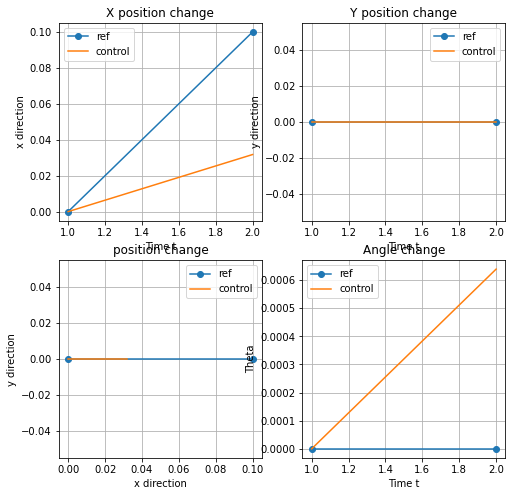

Point 2 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[0.2 0.  0. ]
0.12044958446756474 [0.2 0.  0. ] [ 7.96279176e-02  3.05716132e-05 -4.32009872e-03] [ 0.71788219 -0.07438329]


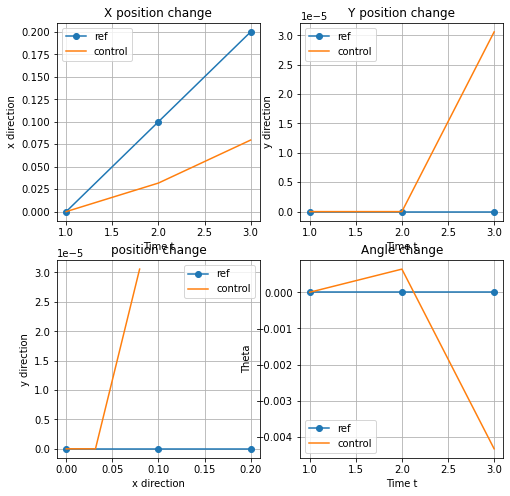

Point 3 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.05]
0.0845094790447648 [ 0.2   0.   -0.05] [ 0.11639738 -0.00012828 -0.03765343] [ 0.5515471 -0.5      ]


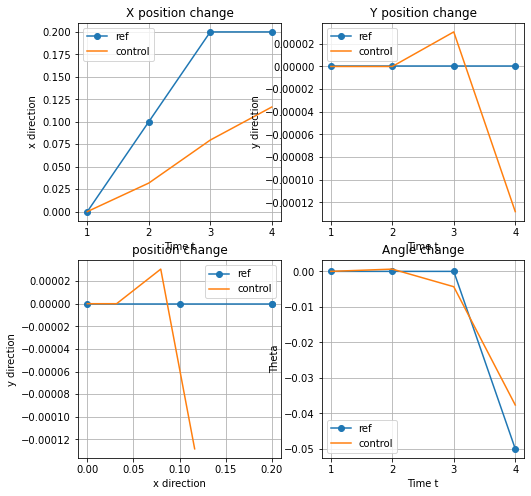

Point 4 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2  0.  -0.1]
0.0643677707006778 [ 0.2  0.  -0.1] [ 0.14255261 -0.00111358 -0.07098678] [ 0.39260668 -0.50000021]


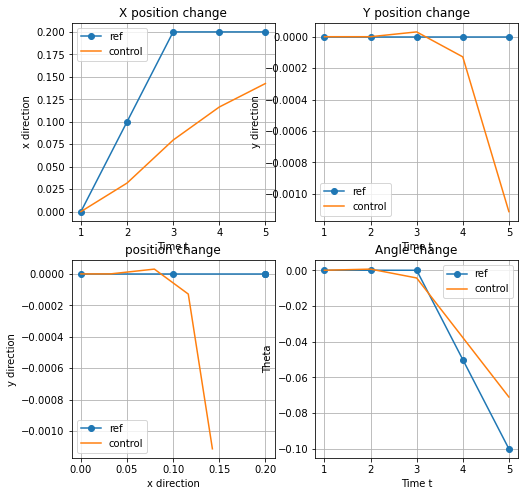

Point 5 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.15]
0.060115423220269505 [ 0.2   0.   -0.15] [ 0.16099583 -0.00242501 -0.10432005] [ 0.27734681 -0.49999902]


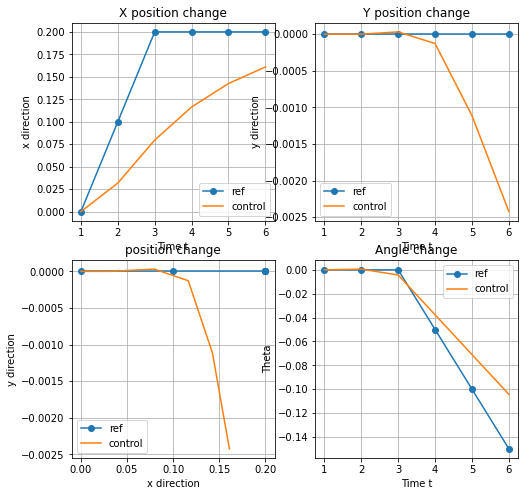

Point 6 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2  0.  -0.2]
0.06760828227841531 [ 0.2  0.  -0.2] [ 0.17412881 -0.00380003 -0.13765322] [ 0.19807145 -0.4999976 ]


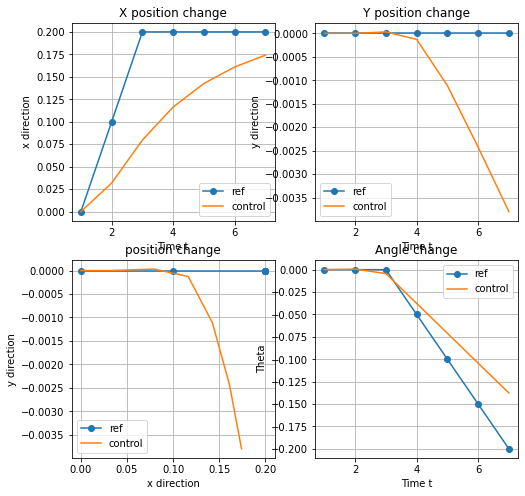

Point 7 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.25]
0.08083964922484096 [ 0.2   0.   -0.25] [ 0.18370026 -0.00512596 -0.17098676] [ 0.14494285 -0.50000311]


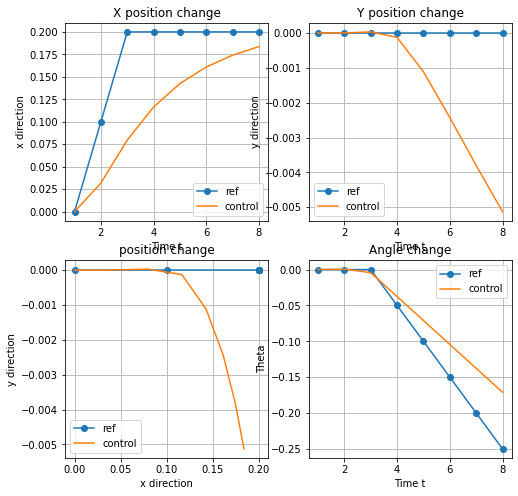

Point 8 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2  0.  -0.3]
0.09633027253595101 [ 0.2  0.  -0.3] [ 0.19080675 -0.00635305 -0.20432009] [ 0.10817488 -0.5       ]


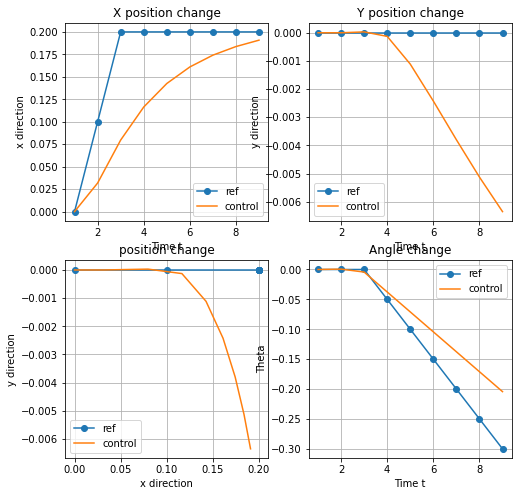

Point 9 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.35]
0.11265864668600965 [ 0.2   0.   -0.35] [ 0.19619808 -0.0074702  -0.23765361] [ 0.08258784 -0.50000267]


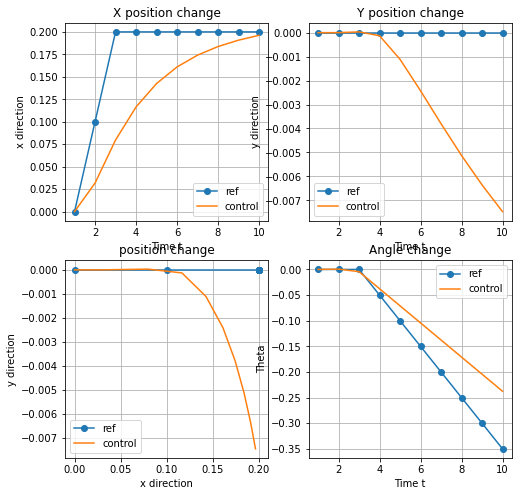

Point 10 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2  0.  -0.4]
0.1292946482067443 [ 0.2  0.  -0.4] [ 0.20050541 -0.00851357 -0.27098694] [ 0.06647836 -0.5       ]


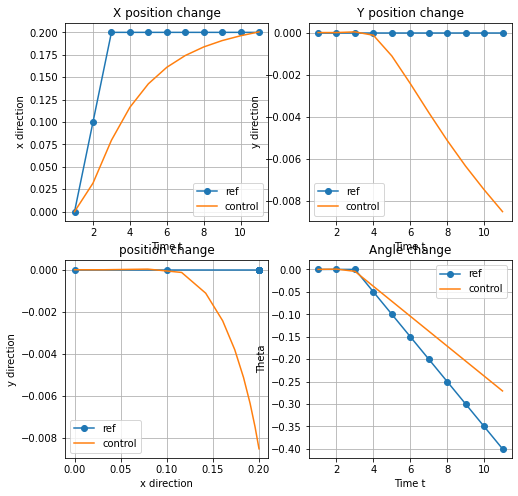

Point 11 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.45]
0.1460540362228626 [ 0.2   0.   -0.45] [ 0.20423887 -0.0095508  -0.30432023] [ 0.05812303 -0.49999934]


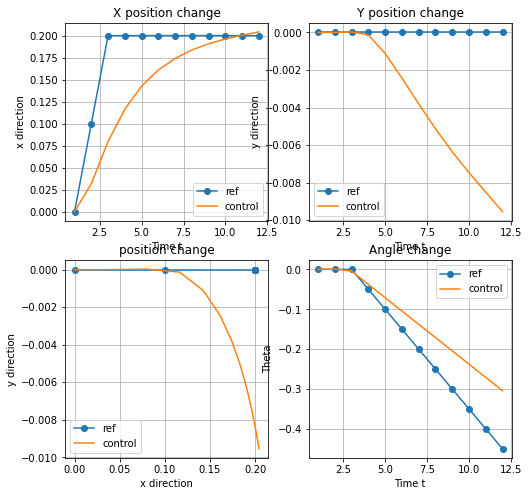

Point 12 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2  0.  -0.5]
0.16287617218596614 [ 0.2  0.  -0.5] [ 0.20768839 -0.01063422 -0.3376533 ] [ 0.05423481 -0.49999613]


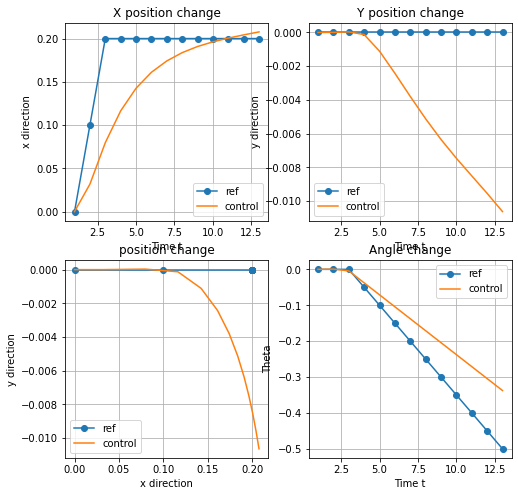

Point 13 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.55]
0.17973368641110227 [ 0.2   0.   -0.55] [ 0.21093608 -0.01177448 -0.37098614] [ 0.05163073 -0.49999254]


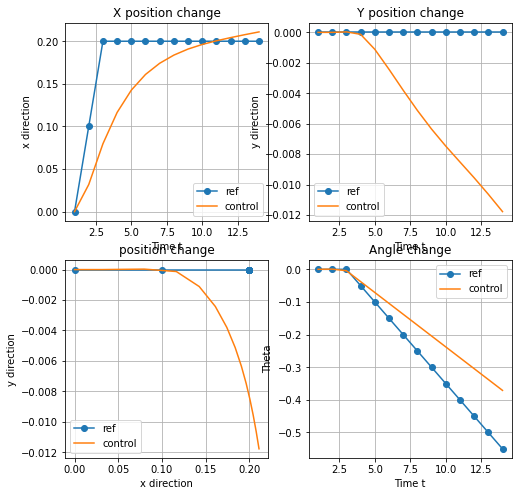

Point 14 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2  0.  -0.6]
0.1966148166795387 [ 0.2  0.  -0.6] [ 0.21405499 -0.01298773 -0.40431872] [ 0.05019862 -0.49998873]


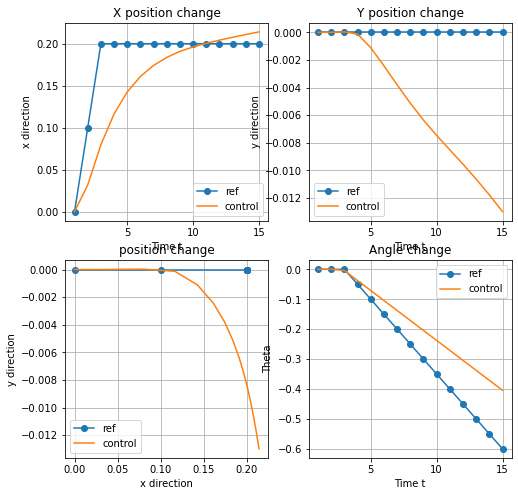

Point 15 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.65]
0.21349514249782076 [ 0.2   0.   -0.65] [ 0.21691745 -0.01421255 -0.43765128] [ 0.04670254 -0.49998836]


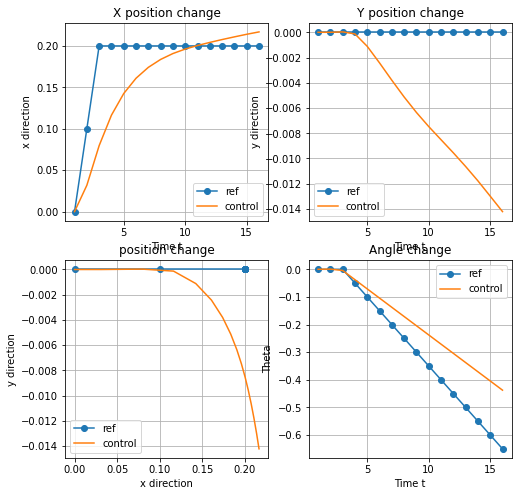

Point 16 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2  0.  -0.7]
0.23032635941591928 [ 0.2  0.  -0.7] [ 0.21920046 -0.01528081 -0.47098456] [ 0.03780861 -0.49999923]


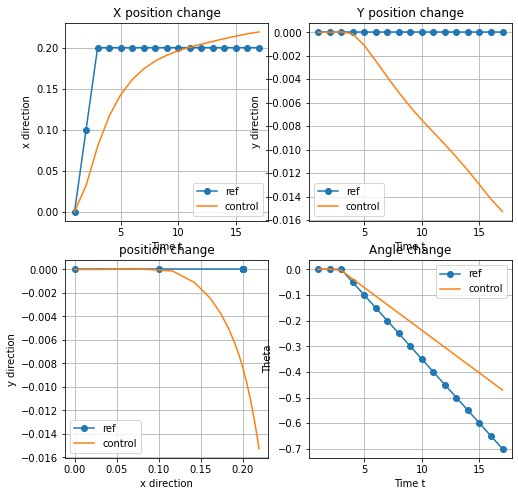

Point 17 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2   0.   -0.75]
0.2471404507332754 [ 0.2   0.   -0.75] [ 0.22125799 -0.01632851 -0.50431752] [ 0.03463387 -0.49999442]


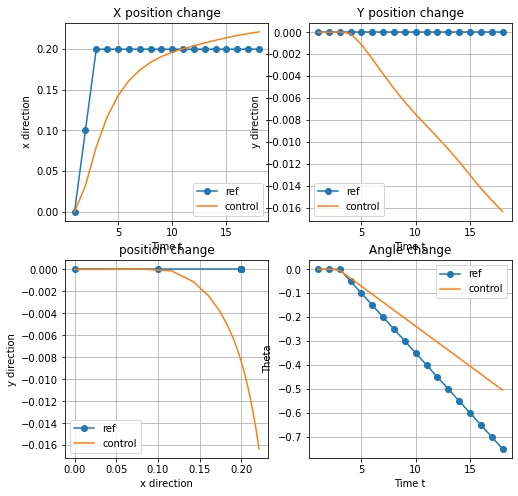

Point 18 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2         0.         -0.78539816]
0.24998714952109408 [ 0.2         0.         -0.78539816] [ 0.22707443 -0.01953873 -0.53765073] [ 0.09965285 -0.49999819]


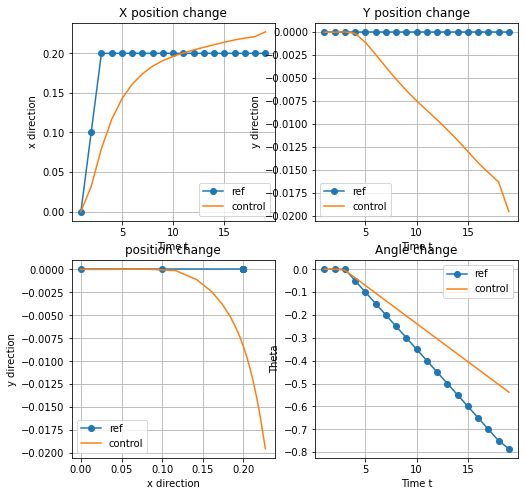

Point 19 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.25       -0.05       -0.78539816]
0.2152657037527142 [ 0.25       -0.05       -0.78539816] [ 0.24658342 -0.03117079 -0.57098475] [ 0.34070335 -0.50001026]


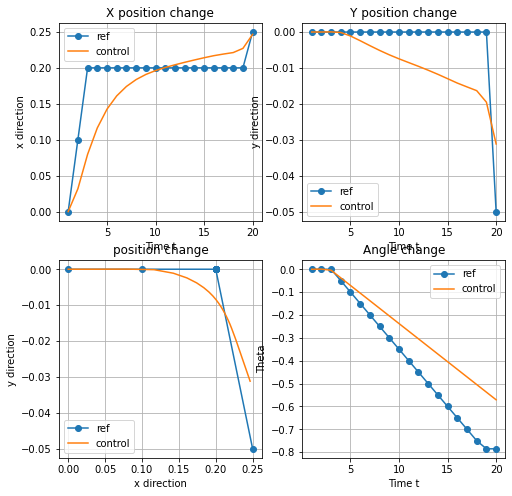

Point 20 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -0.78539816]
0.190424776062713 [ 0.3        -0.1        -0.78539816] [ 0.27256195 -0.04785832 -0.60431809] [ 0.46314744 -0.5       ]


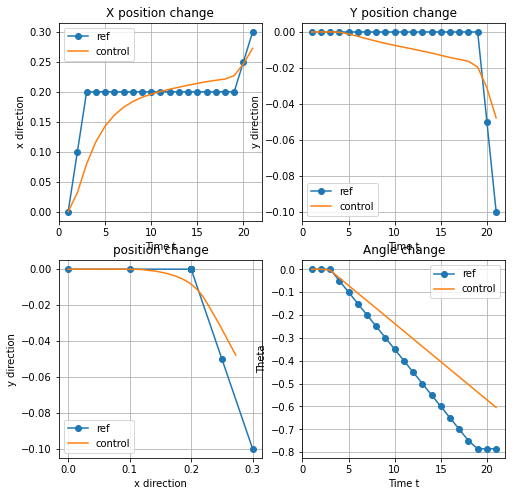

Point 21 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -0.78539816]
0.15323280118238886 [ 0.3        -0.1        -0.78539816] [ 0.29075997 -0.06042396 -0.63765294] [ 0.33172153 -0.50002286]


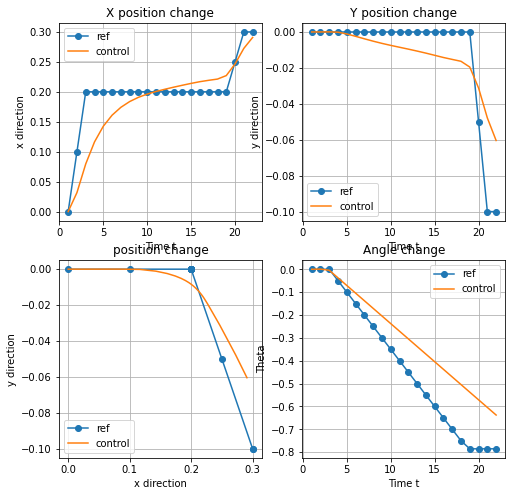

Point 22 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -0.83539816]
0.16721000250358184 [ 0.3        -0.1        -0.83539816] [ 0.30330422 -0.06971802 -0.67098628] [ 0.23418153 -0.5       ]


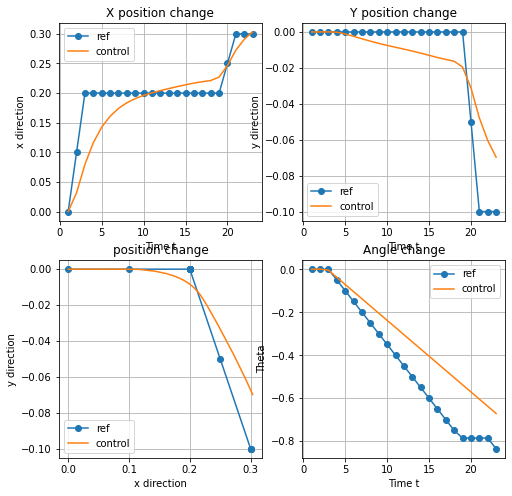

Point 23 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -0.88539816]
0.1829761136346681 [ 0.3        -0.1        -0.88539816] [ 0.31199621 -0.07661825 -0.70431906] [ 0.1664689  -0.49999171]


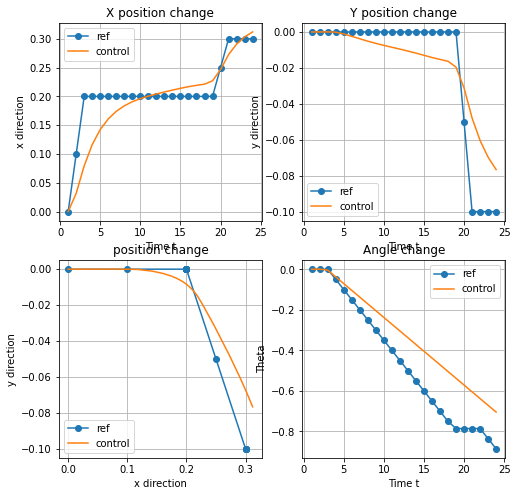

Point 24 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -0.93539816]
0.1994076340061716 [ 0.3        -0.1        -0.93539816] [ 0.31827379 -0.0819523  -0.73765147] [ 0.12356572 -0.49998624]


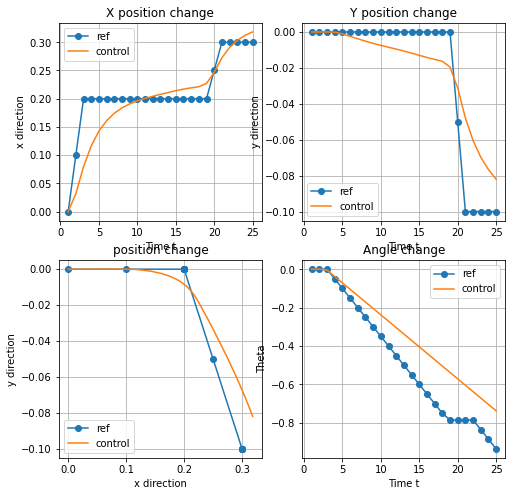

Point 25 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -0.98539816]
0.2160832400268189 [ 0.3        -0.1        -0.98539816] [ 0.32300218 -0.08624943 -0.77098317] [ 0.0958394  -0.49997551]


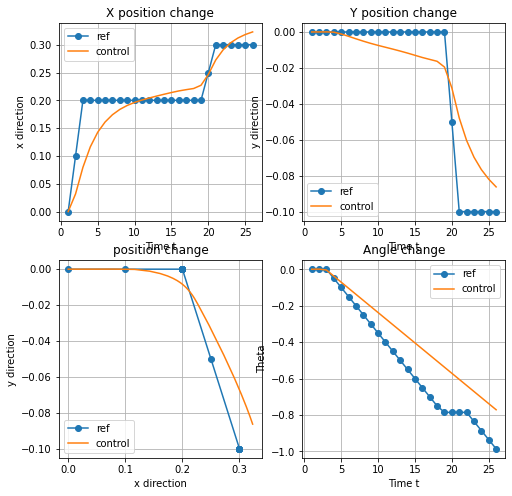

Point 26 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.03539816]
0.23284366457378308 [ 0.3        -0.1        -1.03539816] [ 0.32674027 -0.08988127 -0.80431649] [ 0.07817805 -0.4999997 ]


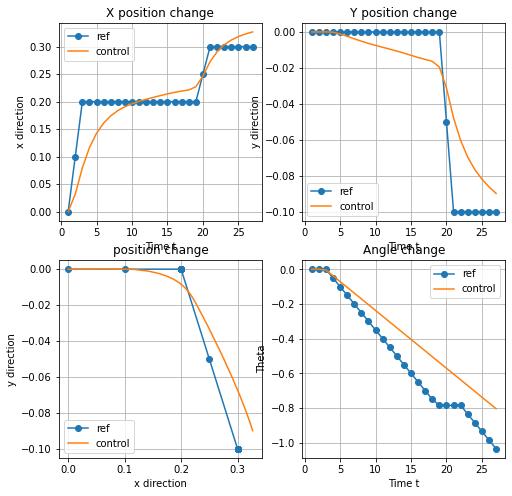

Point 27 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.08539816]
0.24963162747693624 [ 0.3        -0.1        -1.08539816] [ 0.32981    -0.0930694  -0.83764974] [ 0.06638647 -0.49999883]


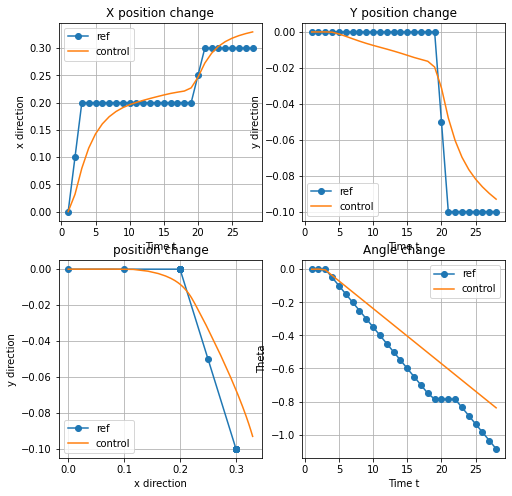

Point 28 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.13539816]
0.2664261678605302 [ 0.3        -0.1        -1.13539816] [ 0.33242311 -0.09597092 -0.87098294] [ 0.05857152 -0.49999794]


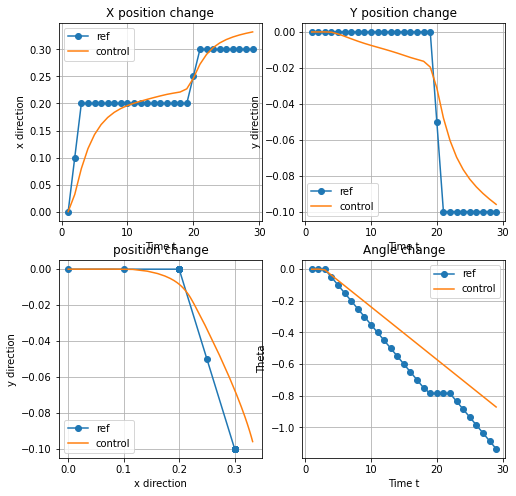

Point 29 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.18539816]
0.28321776236349544 [ 0.3        -0.1        -1.18539816] [ 0.33468997 -0.09866325 -0.90431611] [ 0.05279335 -0.4999976 ]


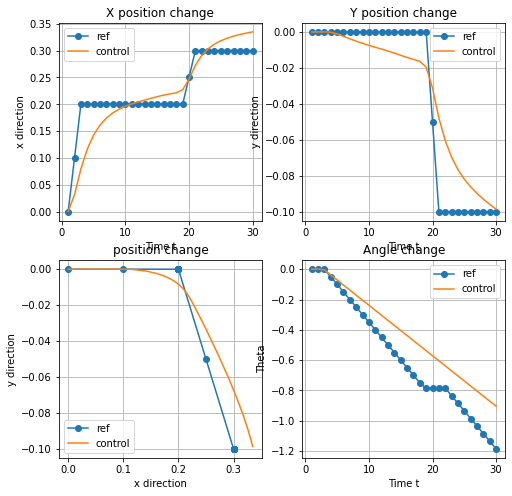

Point 30 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.23539816]
0.299995348370796 [ 0.3        -0.1        -1.23539816] [ 0.33662773 -0.1011269  -0.93764936] [ 0.04701603 -0.49999877]


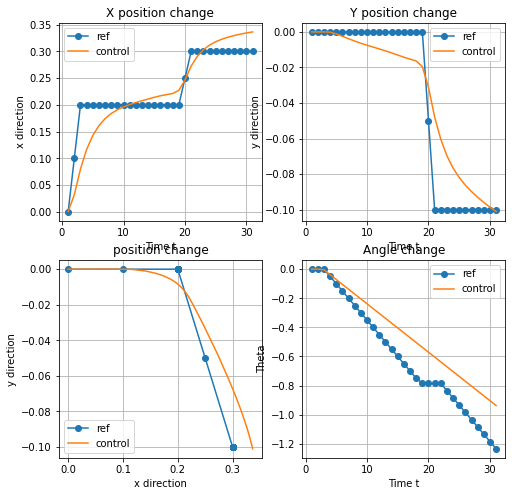

Point 31 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.28539816]
0.31675210831229245 [ 0.3        -0.1        -1.28539816] [ 0.33825644 -0.10334601 -0.9709826 ] [ 0.04128987 -0.49999854]


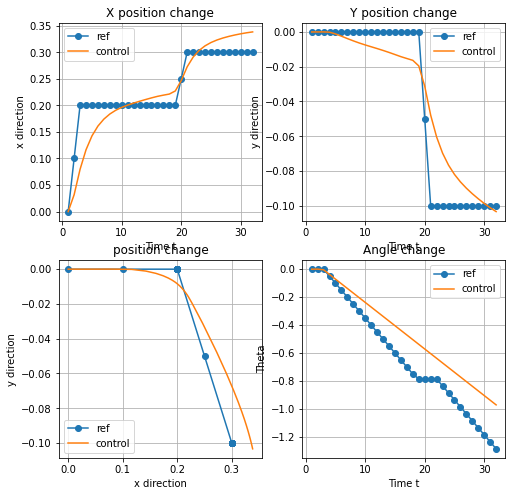

Point 32 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.33539816]
0.3334925936173271 [ 0.3        -0.1        -1.33539816] [ 0.33965722 -0.10539435 -1.00431582] [ 0.03722268 -0.49999838]


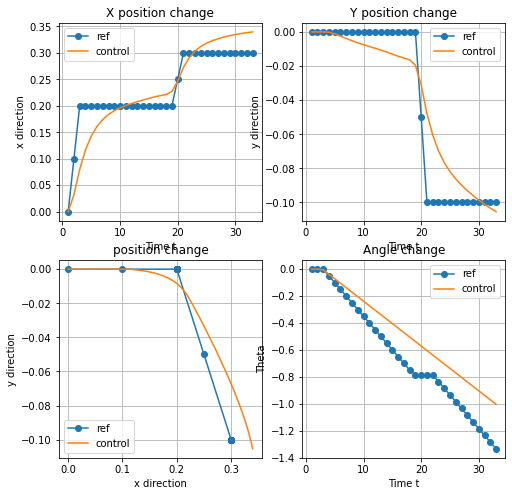

Point 33 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.38539816]
0.3502207972057125 [ 0.3        -0.1        -1.38539816] [ 0.34088448 -0.10732395 -1.03764908] [ 0.0343022  -0.49999882]


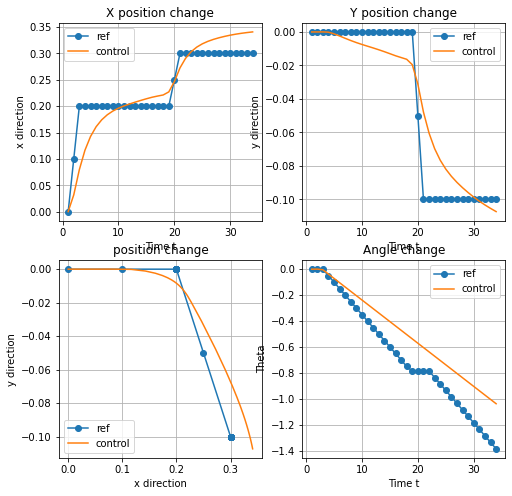

Point 34 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.43539816]
0.366932506363642 [ 0.3        -0.1        -1.43539816] [ 0.34192757 -0.10909145 -1.07098234] [ 0.03078505 -0.499999  ]


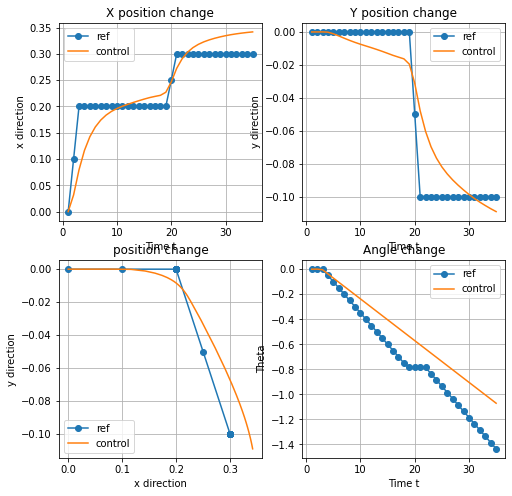

Point 35 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.48539816]
0.38362477527706607 [ 0.3        -0.1        -1.48539816] [ 0.34277935 -0.11065132 -1.10431491] [ 0.02665927 -0.49998851]


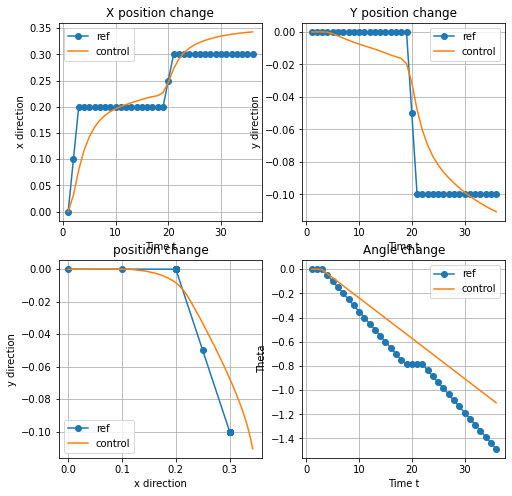

Point 36 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.53539816]
0.4003338137571996 [ 0.3        -0.1        -1.53539816] [ 0.34367563 -0.11243125 -1.13764816] [ 0.02989281 -0.49999871]


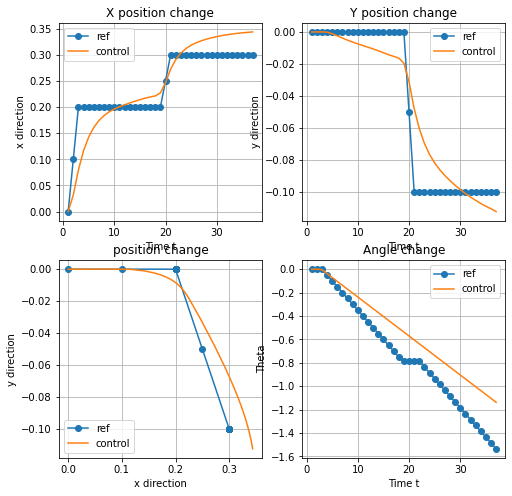

Point 37 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.1        -1.57079633]
0.4027398175058627 [ 0.3        -0.1        -1.57079633] [ 0.34555534 -0.11649604 -1.17098143] [ 0.0671756  -0.49999905]


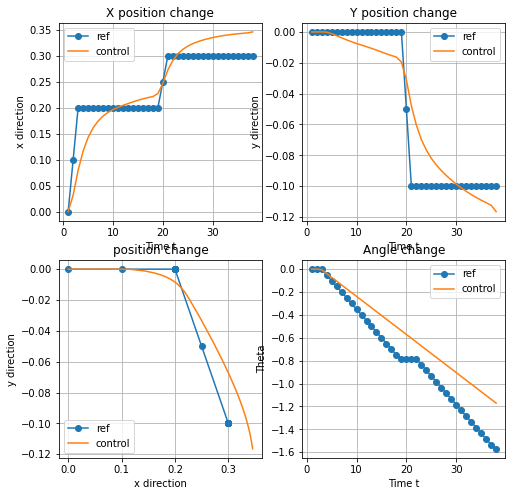

Point 38 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.57079633]
0.3770938072768187 [ 0.3        -0.2        -1.57079633] [ 0.3497353  -0.12638768 -1.20431663] [ 0.16107837 -0.50002805]


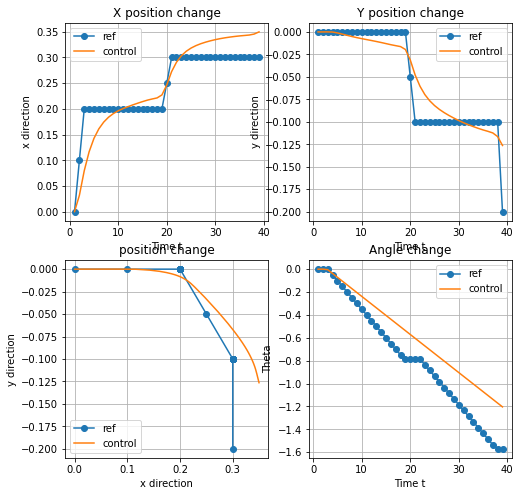

Point 39 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.62079633]
0.3921480476970713 [ 0.3        -0.2        -1.62079633] [ 0.35329834 -0.13567081 -1.23764997] [ 0.14915138 -0.5       ]


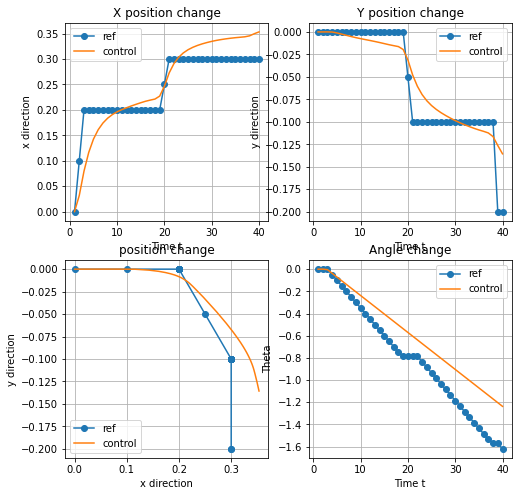

Point 40 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.67079633]
0.4076470205067166 [ 0.3        -0.2        -1.67079633] [ 0.35600639 -0.14349655 -1.27098795] [ 0.12421574 -0.50006977]


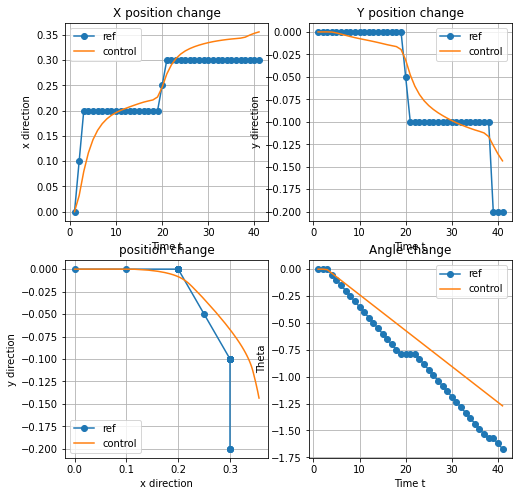

Point 41 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.72079633]
0.4234281648535014 [ 0.3        -0.2        -1.72079633] [ 0.35814297 -0.15040823 -1.30432128] [ 0.10851563 -0.5       ]


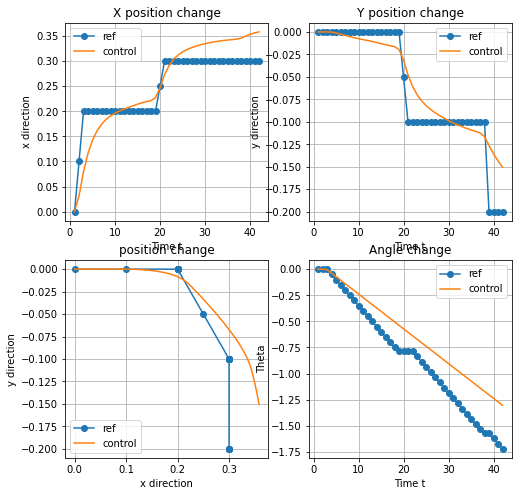

Point 42 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.77079633]
0.43941181033451954 [ 0.3        -0.2        -1.77079633] [ 0.35979324 -0.15645389 -1.33765519] [ 0.09400285 -0.5000086 ]


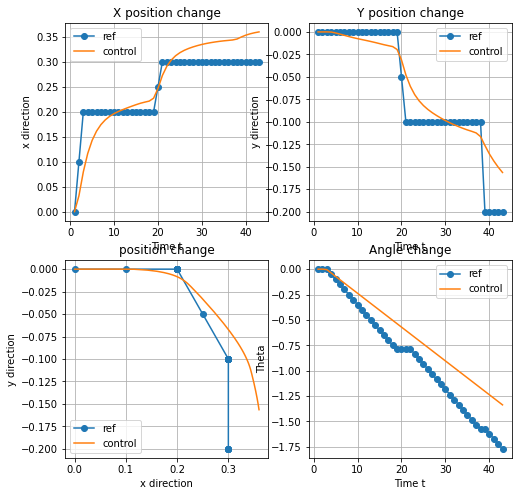

Point 43 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.82079633]
0.45552743463007206 [ 0.3        -0.2        -1.82079633] [ 0.3611116  -0.16200584 -1.37098852] [ 0.08559493 -0.5       ]


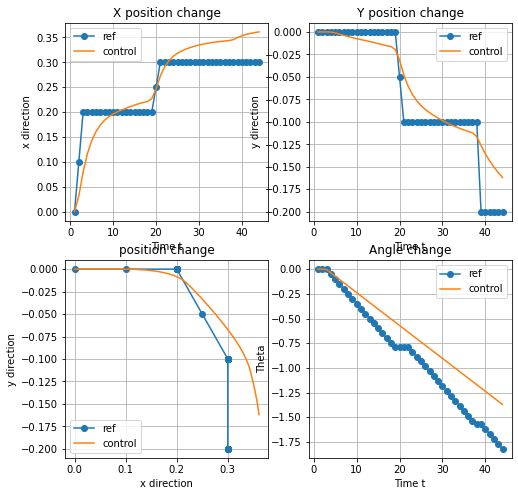

Point 44 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.87079633]
0.47174307823809386 [ 0.3        -0.2        -1.87079633] [ 0.36214519 -0.16710971 -1.4043226 ] [ 0.07811208 -0.50001117]


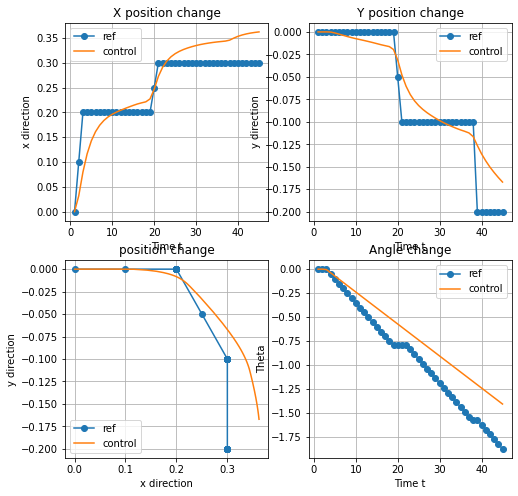

Point 45 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.92079633]
0.4880266060677524 [ 0.3        -0.2        -1.92079633] [ 0.36298383 -0.17210077 -1.43765593] [ 0.07591536 -0.5       ]


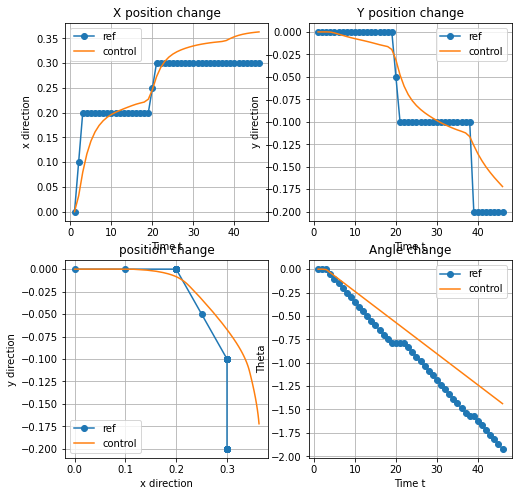

Point 46 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -1.97079633]
0.5043663612778475 [ 0.3        -0.2        -1.97079633] [ 0.36364001 -0.17700011 -1.47098998] [ 0.07414633 -0.50001074]


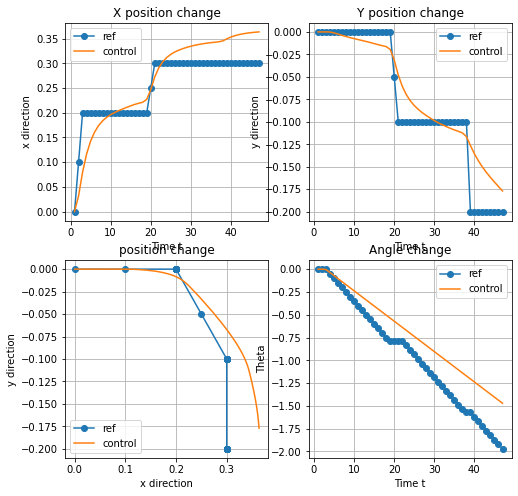

Point 47 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.02079633]
0.5207532119319184 [ 0.3        -0.2        -2.02079633] [ 0.36413418 -0.181935   -1.50432332] [ 0.07439355 -0.5       ]


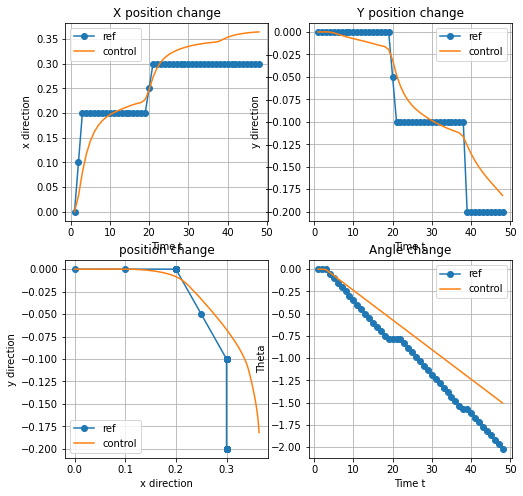

Point 48 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.07079633]
0.5371830773142158 [ 0.3        -0.2        -2.07079633] [ 0.36446046 -0.18683612 -1.5376573 ] [ 0.07367952 -0.50000977]


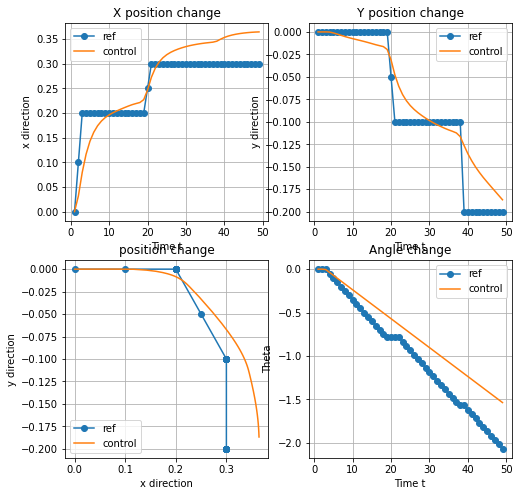

Point 49 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.12079633]
0.5536510929616004 [ 0.3        -0.2        -2.12079633] [ 0.36462611 -0.191833   -1.57099063] [ 0.07499442 -0.5       ]


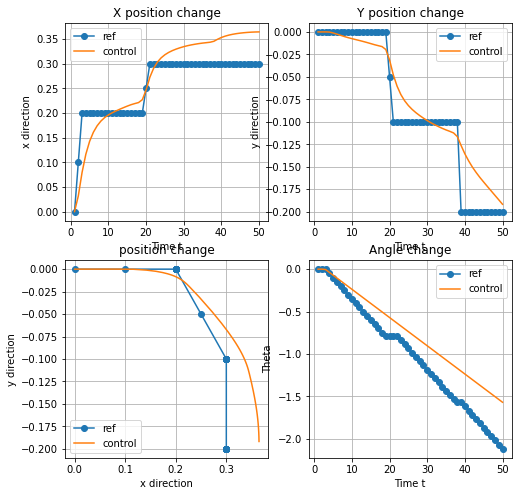

Point 50 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.17079633]
0.5701547343519021 [ 0.3        -0.2        -2.17079633] [ 0.36462512 -0.19692324 -1.60432431] [ 0.07635359 -0.50000509]


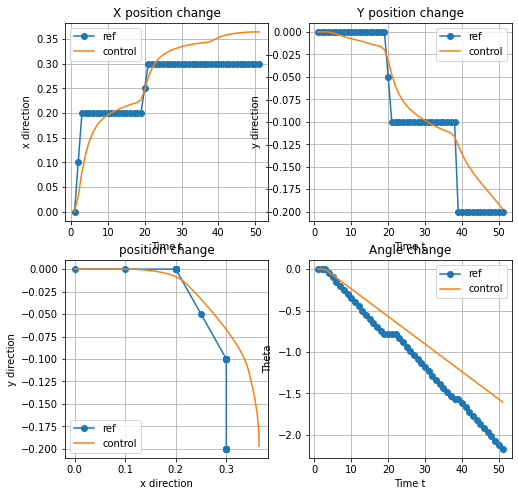

Point 51 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.22079633]
0.5866934291565359 [ 0.3        -0.2        -2.22079633] [ 0.36444175 -0.20239028 -1.63765764] [ 0.08205167 -0.5       ]


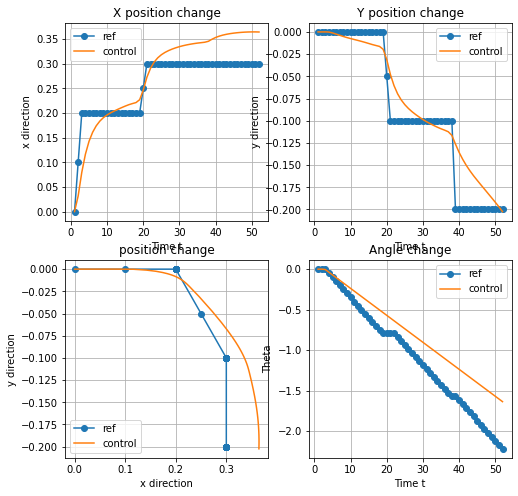

Point 52 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.27079633]
0.6032688818751136 [ 0.3        -0.2        -2.27079633] [ 0.36403474 -0.20846868 -1.67099538] [ 0.09138028 -0.50006606]


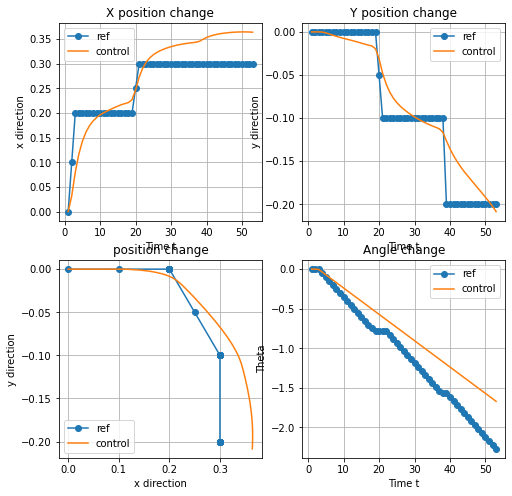

Point 53 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.32079633]
0.6198942130143438 [ 0.3        -0.2        -2.32079633] [ 0.36340937 -0.21468898 -1.70432871] [ 0.09377475 -0.5       ]


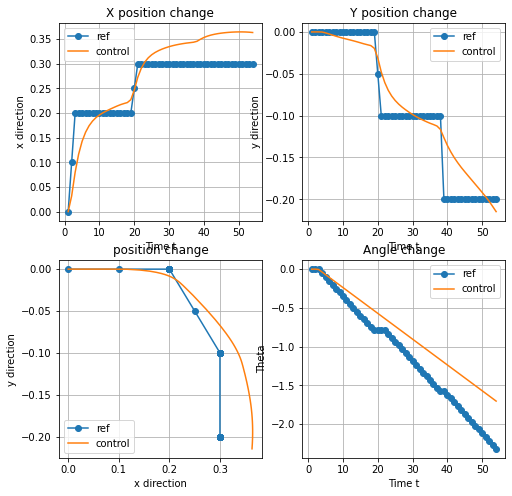

Point 54 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.3        -0.2        -2.35619449]
0.6219852931231891 [ 0.3        -0.2        -2.35619449] [ 0.36296095 -0.21802713 -1.73766668] [ 0.05052202 -0.5000696 ]


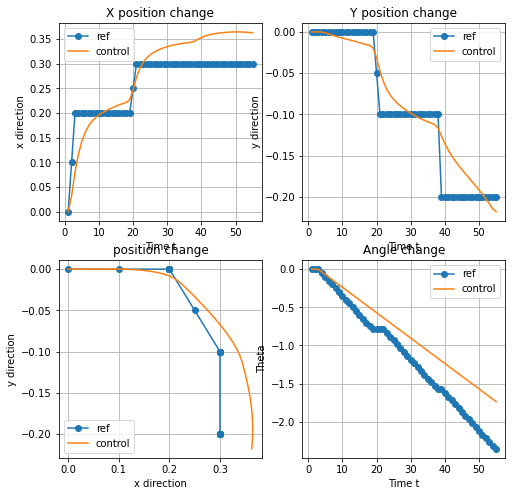

Point 55 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.25       -0.25       -2.35619449]
0.5973348579020216 [ 0.25       -0.25       -2.35619449] [ 0.36386029 -0.21268784 -1.77100002] [-0.08121754 -0.5       ]


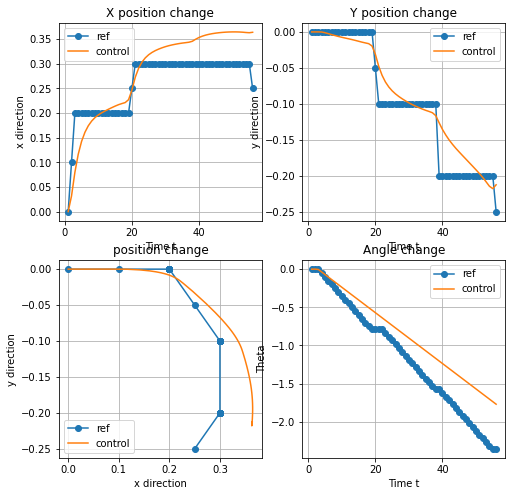

Point 56 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.35619449]
0.584937265930599 [ 0.2        -0.3        -2.35619449] [ 0.36635982 -0.20037014 -1.80433409] [-0.18853116 -0.50001101]


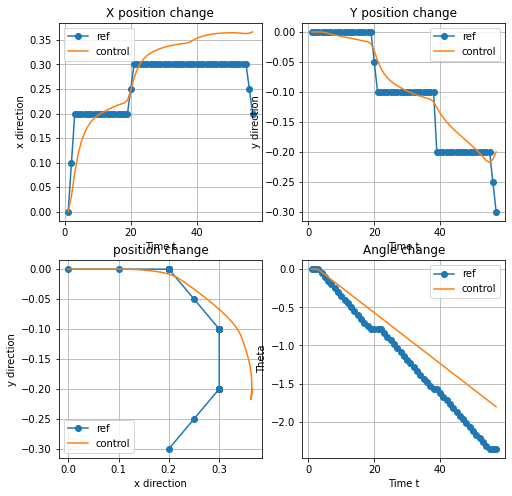

Point 57 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.35619449]
0.557084993818294 [ 0.2        -0.3        -2.35619449] [ 0.3695096  -0.187129   -1.83766742] [-0.20415925 -0.5       ]


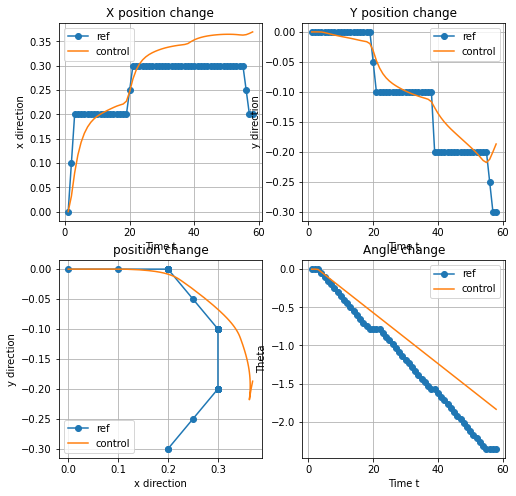

Point 58 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.40619449]
0.5759144997631885 [ 0.2        -0.3        -2.40619449] [ 0.37262846 -0.17572099 -1.87100139] [-0.17739998 -0.50000959]


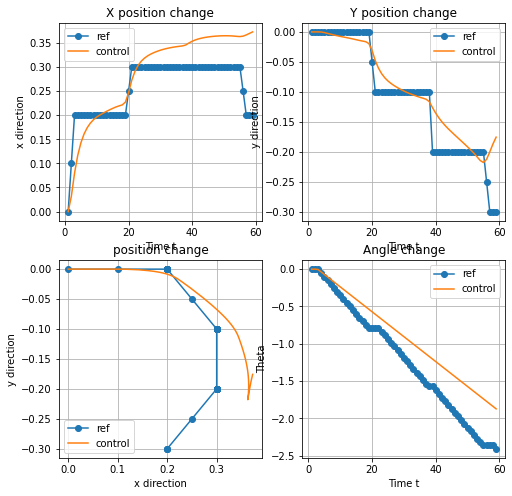

Point 59 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.45619449]
0.5946509585866512 [ 0.2        -0.3        -2.45619449] [ 0.3758476  -0.16532193 -1.90433473] [-0.16328882 -0.5       ]


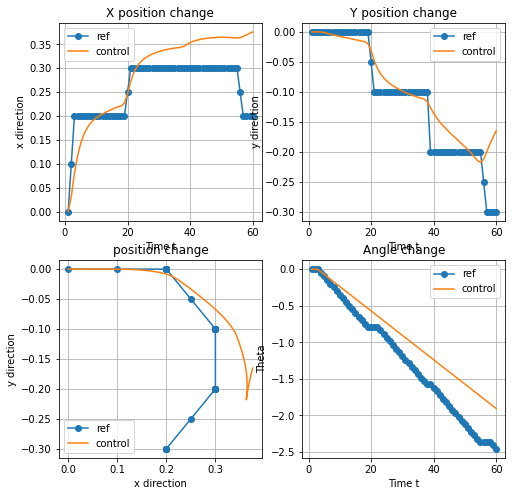

Point 60 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.50619449]
0.6130111679673323 [ 0.2        -0.3        -2.50619449] [ 0.37887213 -0.15659272 -1.9376685 ] [-0.13857505 -0.50000657]


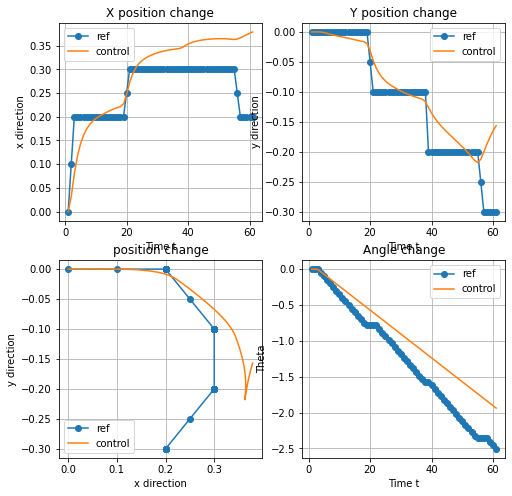

Point 61 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.55619449]
0.6312200261627532 [ 0.2        -0.3        -2.55619449] [ 0.38191125 -0.14868388 -1.97100183] [-0.12708994 -0.5       ]


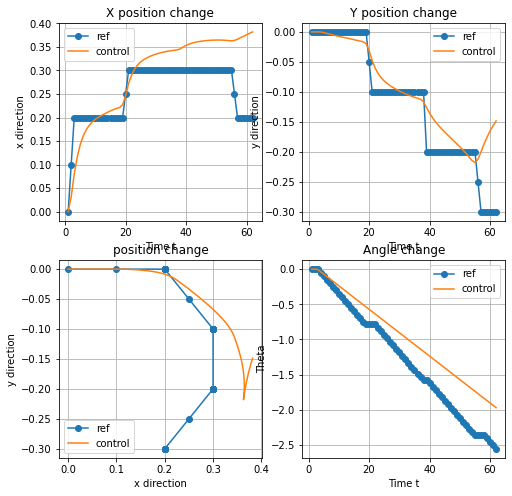

Point 62 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.60619449]
0.649022449070668 [ 0.2        -0.3        -2.60619449] [ 0.38465202 -0.14220507 -2.00433526] [-0.10552026 -0.50000147]


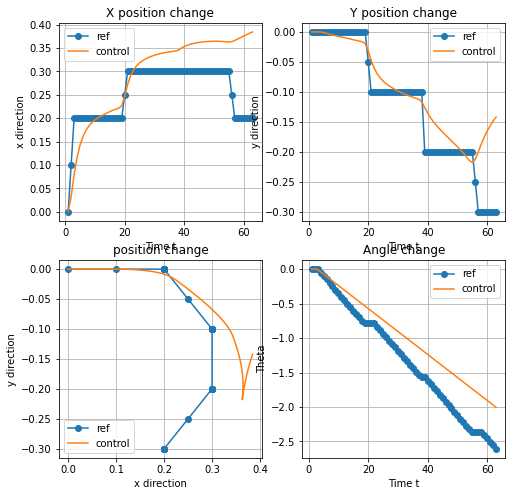

Point 63 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.65619449]
0.6666696175781653 [ 0.2        -0.3        -2.65619449] [ 0.3873514  -0.13637375 -2.03766859] [-0.096387 -0.5     ]


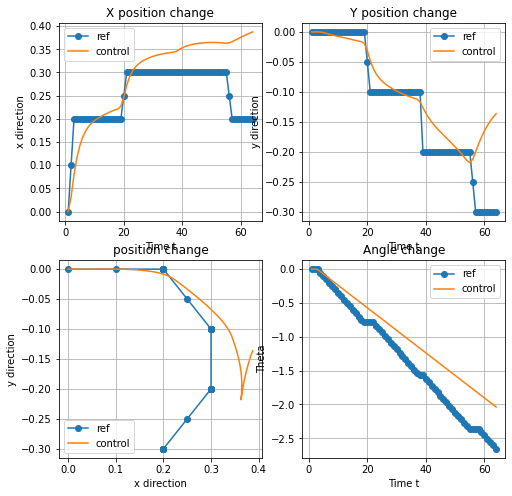

Point 64 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.70619449]
0.6839297794680392 [ 0.2        -0.3        -2.70619449] [ 0.38968437 -0.13174519 -2.07100152] [-0.07774909 -0.49999395]


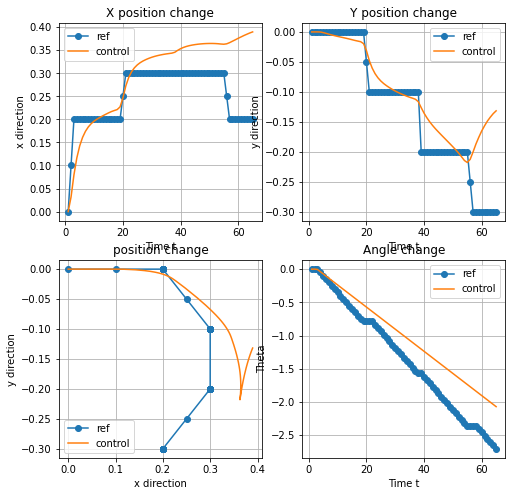

Point 65 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.75619449]
0.7009121983214364 [ 0.2        -0.3        -2.75619449] [ 0.3917423  -0.12798001 -2.10433414] [-0.06436333 -0.49998918]


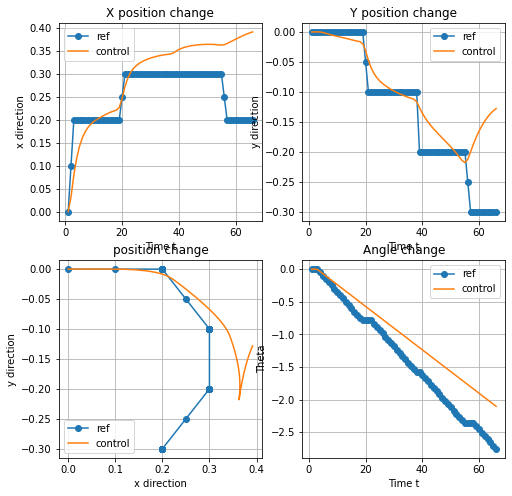

Point 66 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.80619449]
0.7176230783112789 [ 0.2        -0.3        -2.80619449] [ 0.39348703 -0.12502624 -2.13766638] [-0.0514586  -0.49998367]


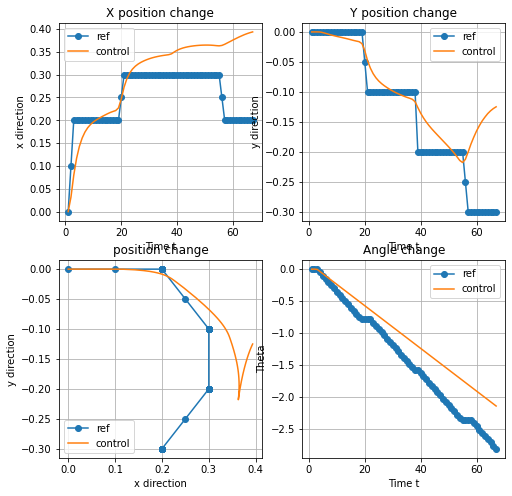

Point 67 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.85619449]
0.7341371337377683 [ 0.2        -0.3        -2.85619449] [ 0.39498902 -0.12266671 -2.17100144] [-0.04195537 -0.50002588]


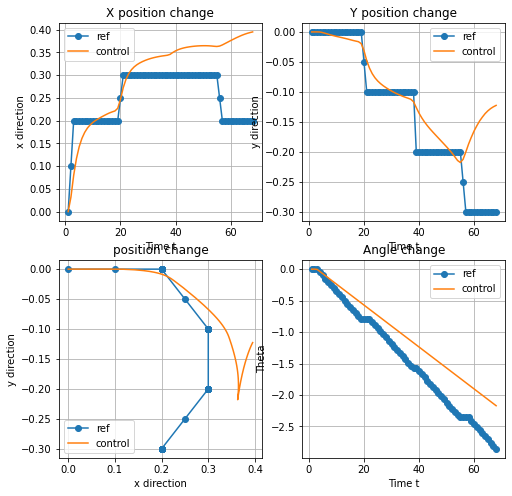

Point 68 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.90619449]
0.7504573372000674 [ 0.2        -0.3        -2.90619449] [ 0.39620761 -0.12088628 -2.20433477] [-0.0323628 -0.5      ]


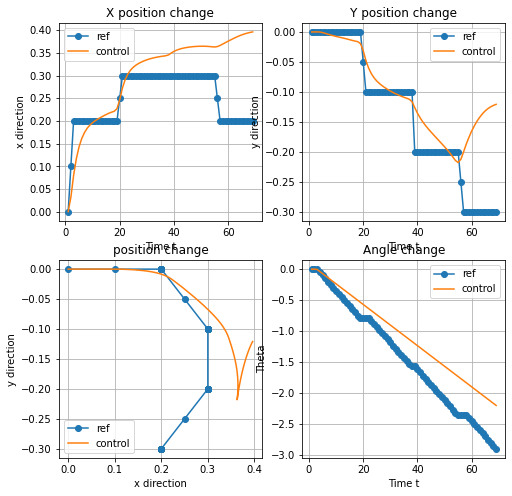

Point 69 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -2.95619449]
0.7664869689292312 [ 0.2        -0.3        -2.95619449] [ 0.39693581 -0.11989493 -2.23766772] [-0.01845089 -0.49999416]


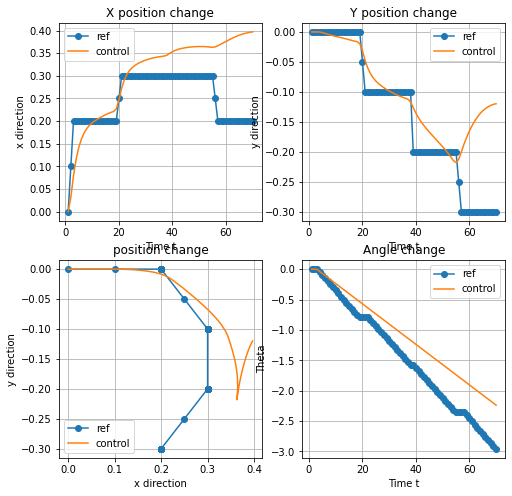

Point 70 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -3.00619449]
0.7821848398731608 [ 0.2        -0.3        -3.00619449] [ 0.39703205 -0.11977266 -2.27100091] [-0.00233401 -0.49999789]


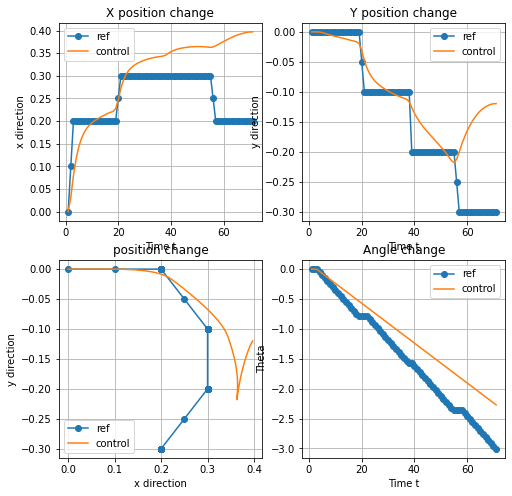

Point 71 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -3.05619449]
0.7972401057457178 [ 0.2        -0.3        -3.05619449] [ 0.39580259 -0.12123173 -2.30433344] [ 0.02861999 -0.49998796]


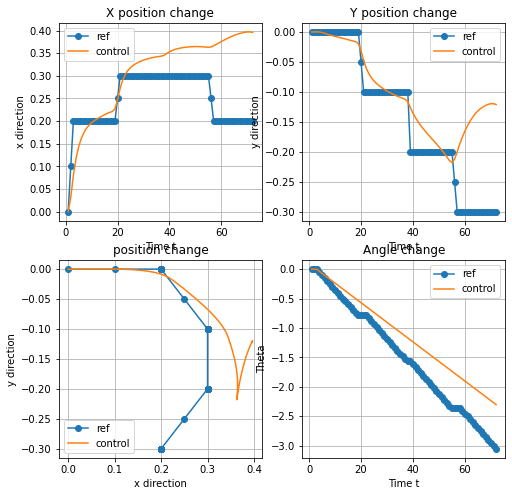

Point 72 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -3.10619449]
0.8121320972621526 [ 0.2        -0.3        -3.10619449] [ 0.39405107 -0.12317503 -2.33766625] [ 0.0392422  -0.49999216]


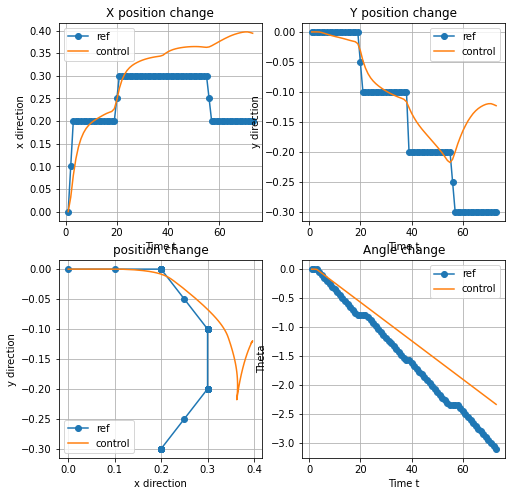

Point 73 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.2        -0.3        -3.14159265]
0.8158006137139953 [ 0.2        -0.3        -3.14159265] [ 0.39766666 -0.11942292 -2.37097572] [-0.07815962 -0.4996421 ]


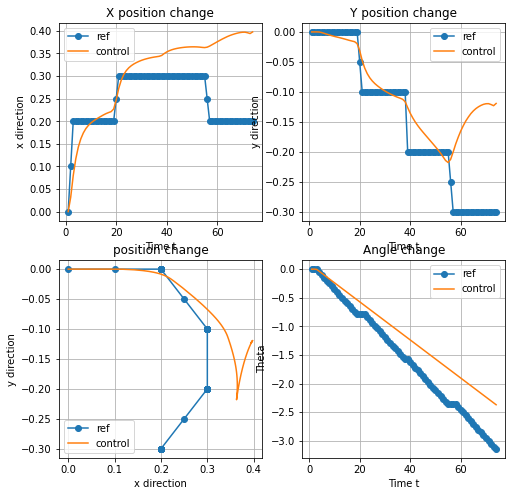

Point 74 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 0.1        -0.3        -3.14159265]
0.8860753717176848 [ 0.1        -0.3        -3.14159265] [ 0.41556703 -0.10204406 -2.33762719] [-0.3742337   0.50022793]


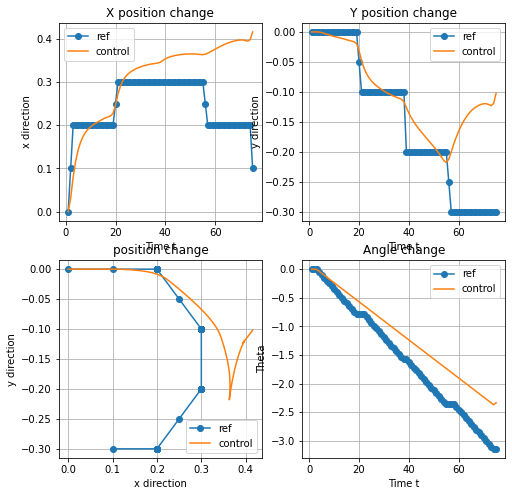

Point 75 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01 -3.14159265e+00]
0.9822837147353565 [ 2.77555756e-17 -3.00000000e-01 -3.14159265e+00] [ 0.45480279 -0.06132355 -2.30429386] [-0.84821053  0.5       ]


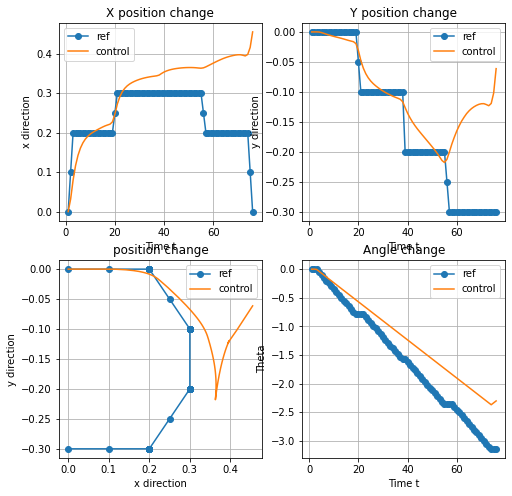

Point 76 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01 -3.19159265e+00]
1.1035011466746687 [ 2.77555756e-17 -3.00000000e-01 -3.19159265e+00] [ 0.52174551  0.01295524 -2.27096492] [-1.49990002  0.49993405]


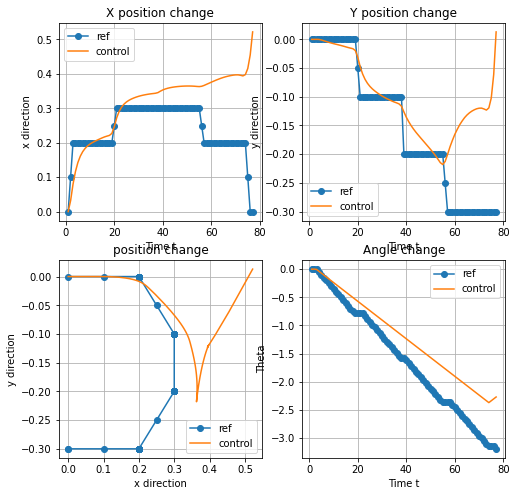

Point 77 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  3.04159265e+00]
1.172085338988183 [ 2.77555756e-17 -3.00000000e-01  3.04159265e+00] [0.58618008 0.08942848 3.97888792] [-1.49999775 -0.49998698]


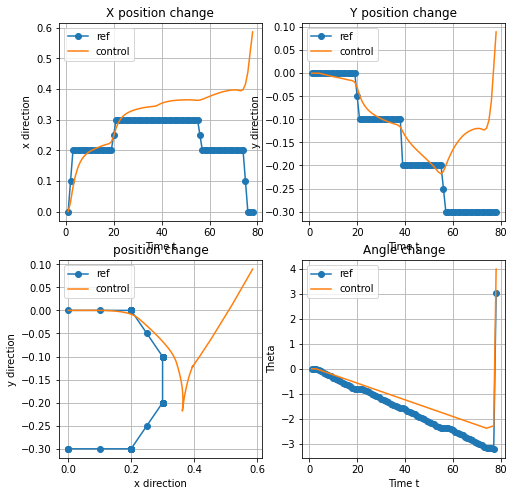

Point 78 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.99159265e+00]
1.2456514447641174 [ 2.77555756e-17 -3.00000000e-01  2.99159265e+00] [0.65312737 0.16371183 3.94555465] [-1.49999661 -0.49999894]


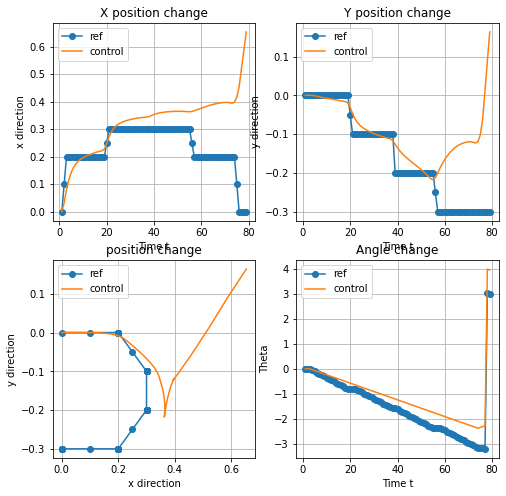

Point 79 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.94159265e+00]
1.3233066122817883 [ 2.77555756e-17 -3.00000000e-01  2.94159265e+00] [0.72251098 0.23572052 3.91222224] [-1.49995024 -0.49998616]


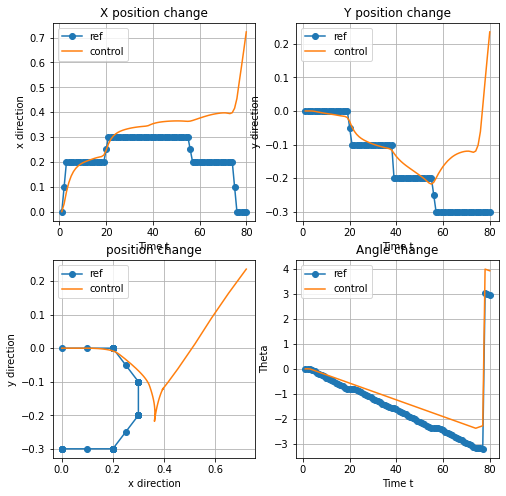

Point 80 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.89159265e+00]
1.4043092989805972 [ 2.77555756e-17 -3.00000000e-01  2.89159265e+00] [0.79425818 0.3053792  3.87888925] [-1.49999945 -0.49999486]


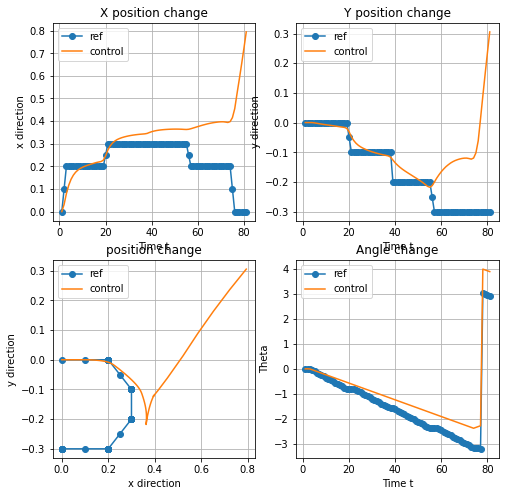

Point 81 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.84159265e+00]
1.4880413598768705 [ 2.77555756e-17 -3.00000000e-01  2.84159265e+00] [0.86828708 0.37260814 3.84555626] [-1.50000062 -0.49999487]


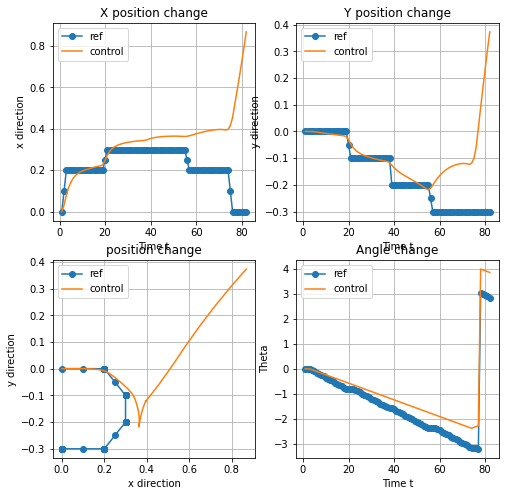

Point 82 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.79159265e+00]
1.5739934011924315 [ 2.77555756e-17 -3.00000000e-01  2.79159265e+00] [0.94451529 0.43733249 3.81222329] [-1.49999858 -0.49999455]


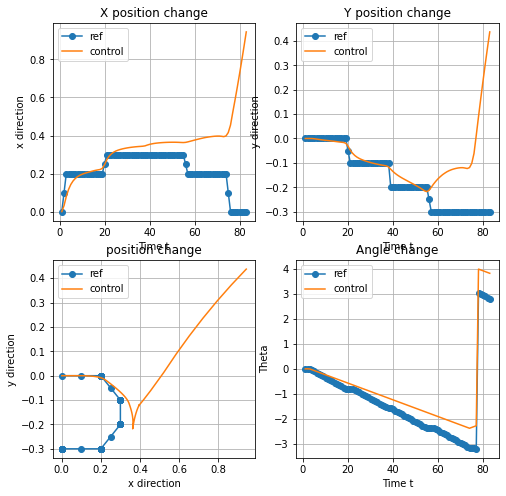

Point 83 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.74159265e+00]
1.661743668183568 [ 2.77555756e-17 -3.00000000e-01  2.74159265e+00] [1.02285698 0.49947948 3.77889116] [-1.49997513 -0.49998199]


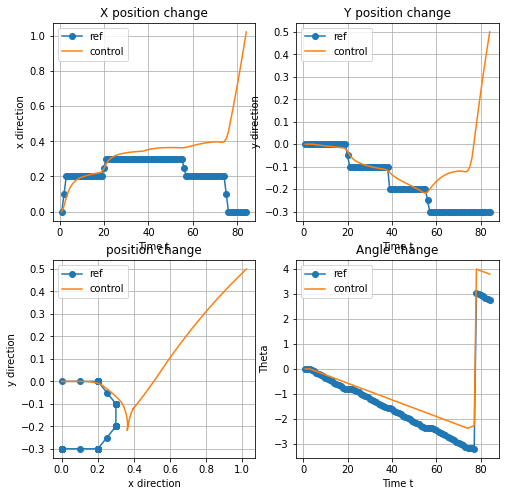

Point 84 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.69159265e+00]
1.7509440448444307 [ 2.77555756e-17 -3.00000000e-01  2.69159265e+00] [1.10322762 0.55898214 3.74555828] [-1.50000057 -0.49999316]


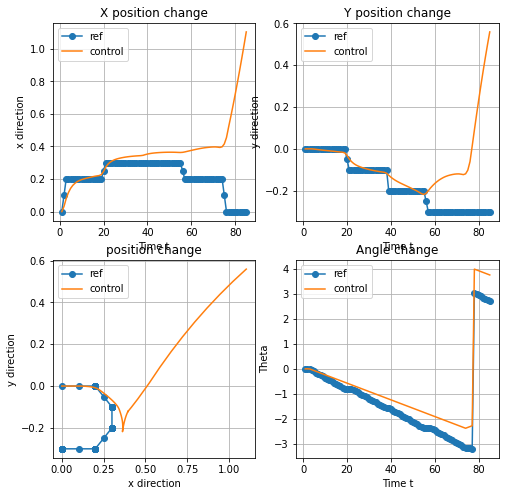

Point 85 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.64159265e+00]
1.8413016995563234 [ 2.77555756e-17 -3.00000000e-01  2.64159265e+00] [1.18553653 0.61577318 3.71222545] [-1.49999836 -0.49999256]


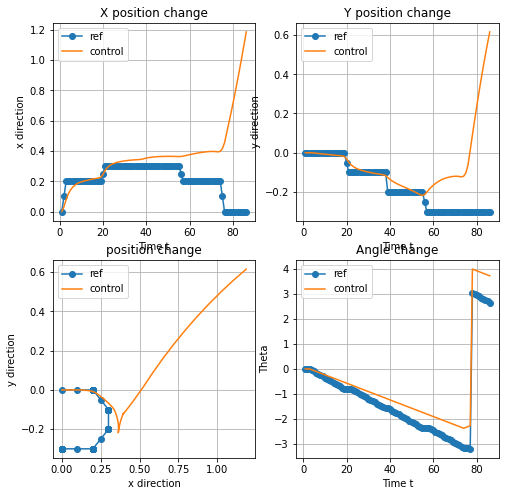

Point 86 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.59159265e+00]
1.9325714748967449 [ 2.77555756e-17 -3.00000000e-01  2.59159265e+00] [1.26969253 0.66978969 3.67889268] [-1.50000116 -0.49999144]


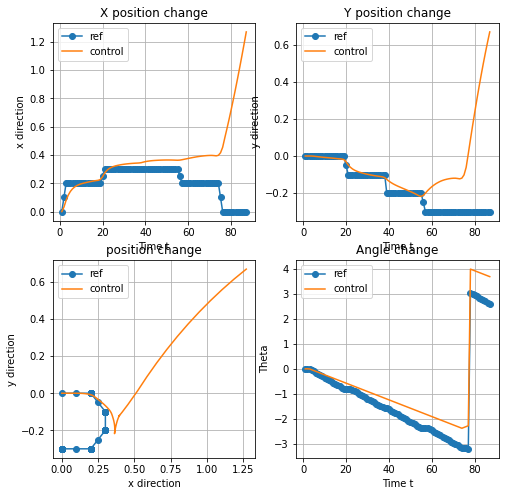

Point 87 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.54159265e+00]
2.024545165289495 [ 2.77555756e-17 -3.00000000e-01  2.54159265e+00] [1.35560185 0.72097149 3.64556002] [-1.4999992  -0.49998988]


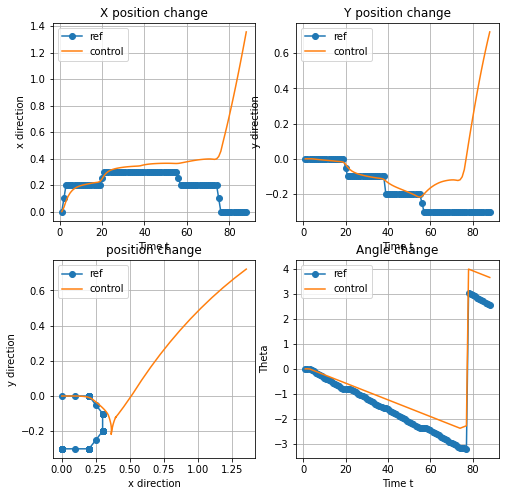

Point 88 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.49159265e+00]
2.1170452100269257 [ 2.77555756e-17 -3.00000000e-01  2.49159265e+00] [1.44316913 0.7692618  3.61222751] [-1.49999868 -0.49998771]


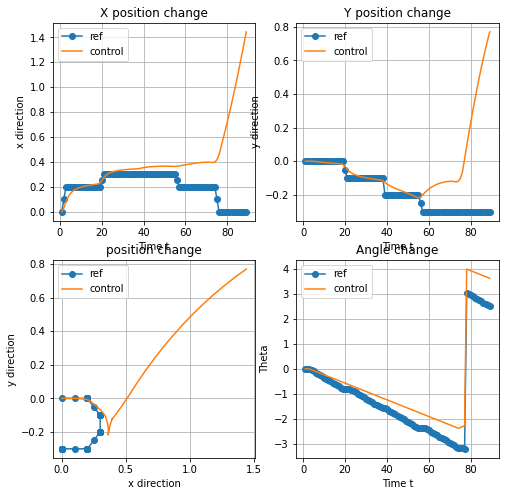

Point 89 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.44159265e+00]
2.2099148733881884 [ 2.77555756e-17 -3.00000000e-01  2.44159265e+00] [1.53229372 0.81460525 3.57889421] [-1.49994154 -0.49999944]


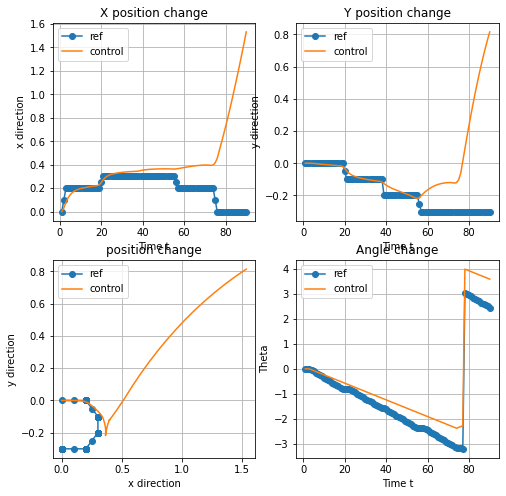

Point 90 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.39159265e+00]
2.3030225274112106 [ 2.77555756e-17 -3.00000000e-01  2.39159265e+00] [1.62287757 0.85695213 3.54556099] [-1.49990191 -0.49999836]


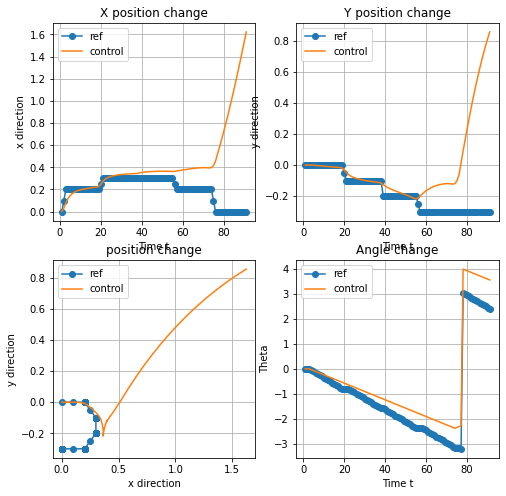

Point 91 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[ 2.77555756e-17 -3.00000000e-01  2.35619449e+00]
2.3891566954870314 [ 2.77555756e-17 -3.00000000e-01  2.35619449e+00] [1.71482492 0.89625767 3.5122277 ] [-1.49994304 -0.49999928]


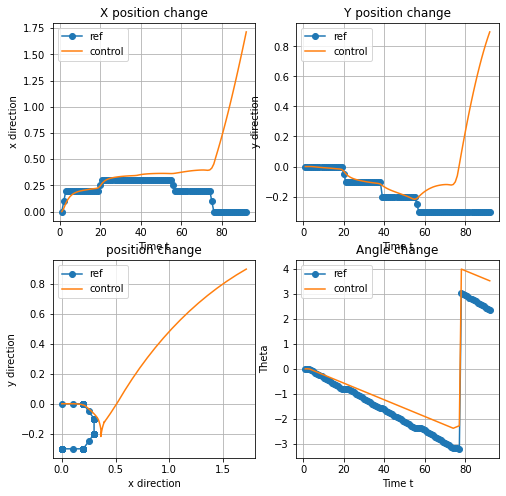

Point 92 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.05       -0.25        2.35619449]
2.472041121911566 [-0.05       -0.25        2.35619449] [1.80803124 0.93247708 3.47889444] [-1.49994478 -0.49999901]


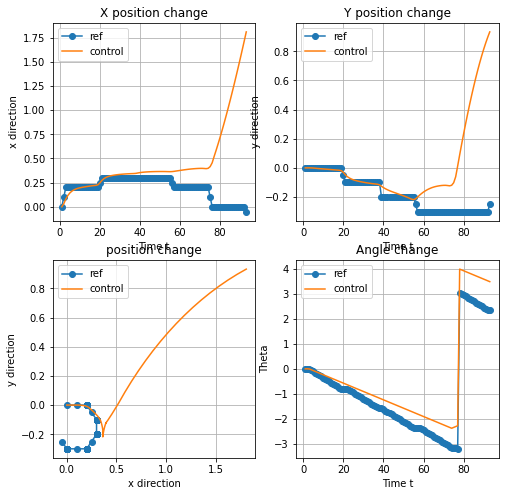

Point 93 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.35619449]
2.560244334814493 [-0.1        -0.2         2.35619449] [1.90239298 0.96557012 3.44556115] [-1.49994653 -0.49999937]


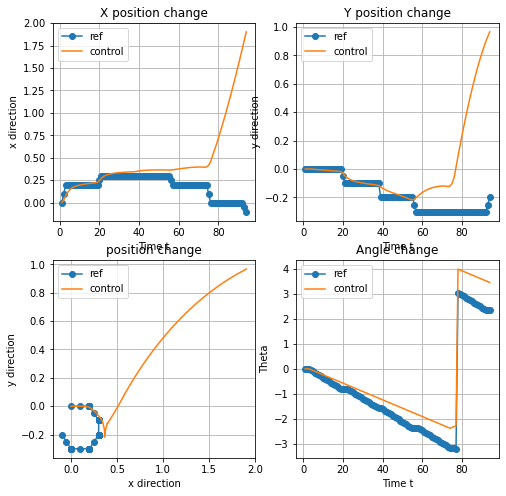

Point 94 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.30619449]
2.6558085989406495 [-0.1        -0.2         2.30619449] [1.99780575 0.99550013 3.41222785] [-1.49995517 -0.49999947]


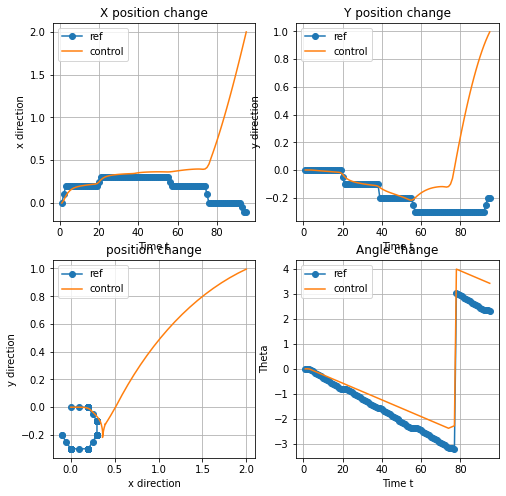

Point 95 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.25619449]
2.751120746787236 [-0.1        -0.2         2.25619449] [2.09416369 1.02223388 3.37889454] [-1.49996595 -0.49999959]


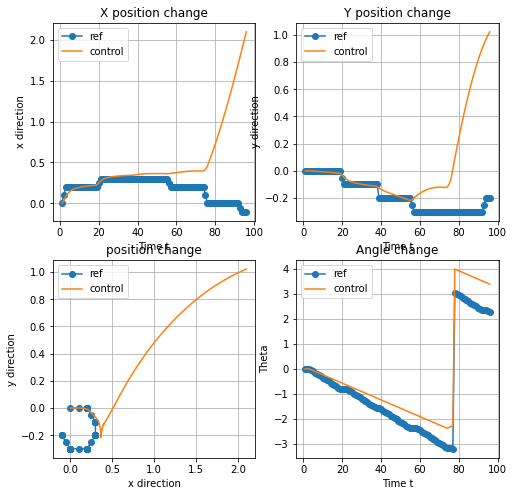

Point 96 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.20619449]
2.8461119470489455 [-0.1        -0.2         2.20619449] [2.19135878 1.04574138 3.34556124] [-1.49996156 -0.49999954]


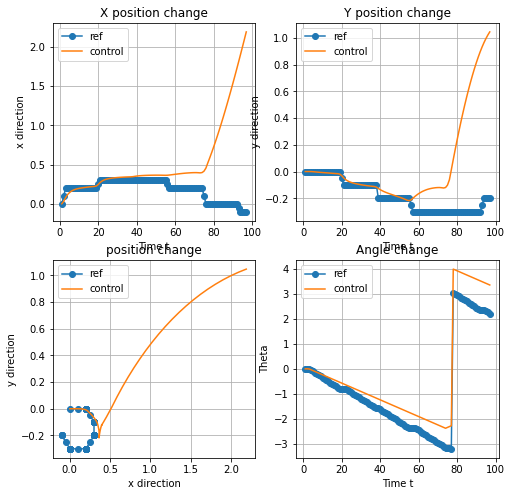

Point 97 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.15619449]
2.940720803679524 [-0.1        -0.2         2.15619449] [2.28928396 1.06599672 3.31222793] [-1.49997153 -0.49999966]


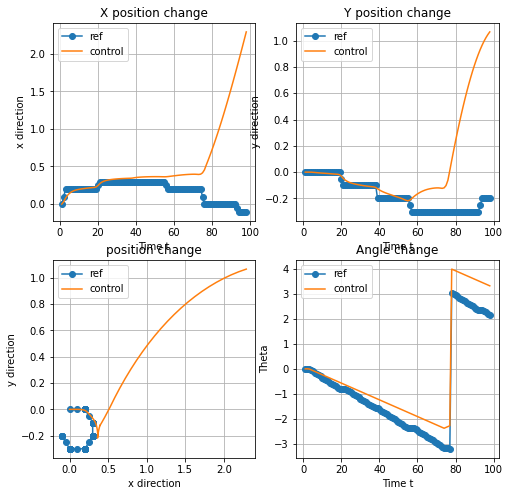

Point 98 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.10619449]
3.034888669632246 [-0.1        -0.2         2.10619449] [2.38782905 1.08297711 3.27889463] [-1.49996007 -0.49999952]


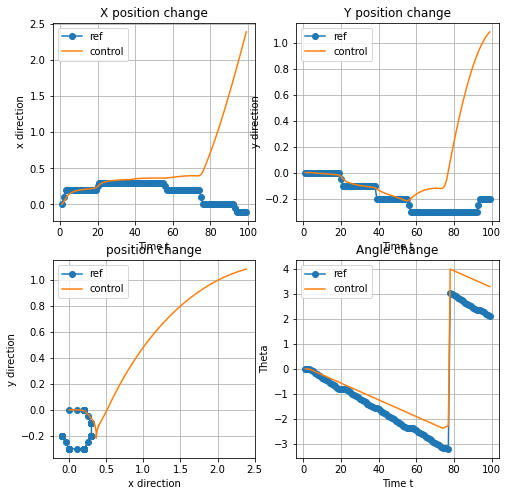

Point 99 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.05619449]
3.128563768131047 [-0.1        -0.2         2.05619449] [2.48688623 1.09666397 3.24556131] [-1.49997415 -0.49999969]


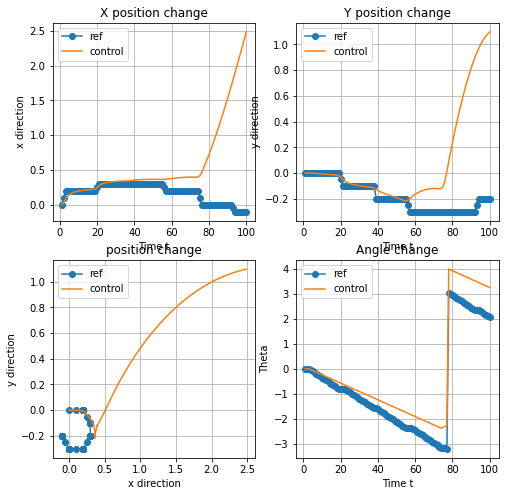

Point 100 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         2.00619449]
3.2216941056554425 [-0.1        -0.2         2.00619449] [2.58634284 1.10704176 3.21222802] [-1.49994875 -0.4999994 ]


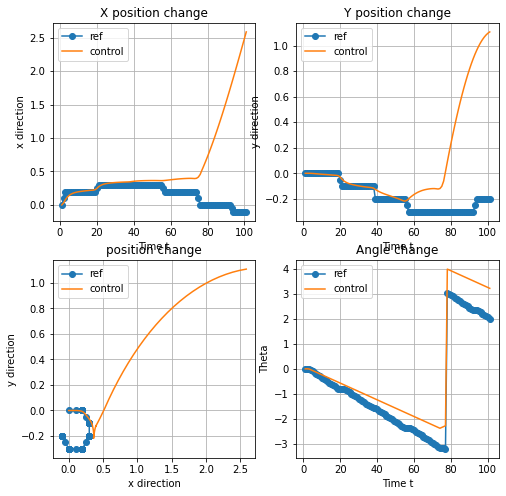

Point 101 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.95619449]
3.3142355886128247 [-0.1        -0.2         1.95619449] [2.68609131 1.11409927 3.17889471] [-1.49996743 -0.49999961]


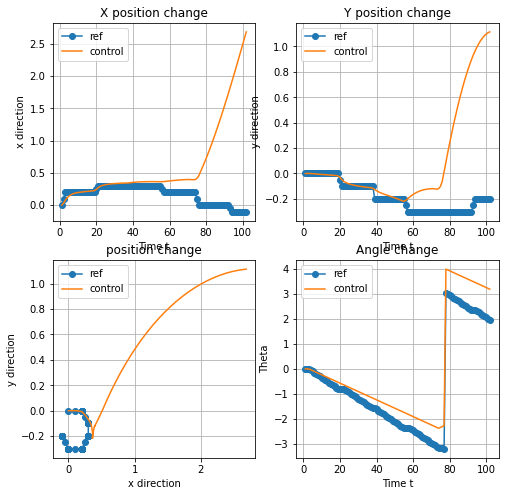

Point 102 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.90619449]
3.4061428065812556 [-0.1        -0.2         1.90619449] [2.78601914 1.11782852 3.14556141] [-1.49996079 -0.49999953]


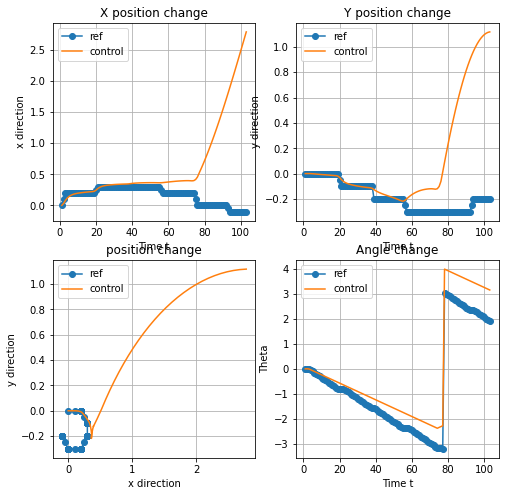

Point 103 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.85619449]
3.497373515286534 [-0.1        -0.2         1.85619449] [2.88601455 1.11822538 3.11222812] [-1.49994298 -0.49999932]


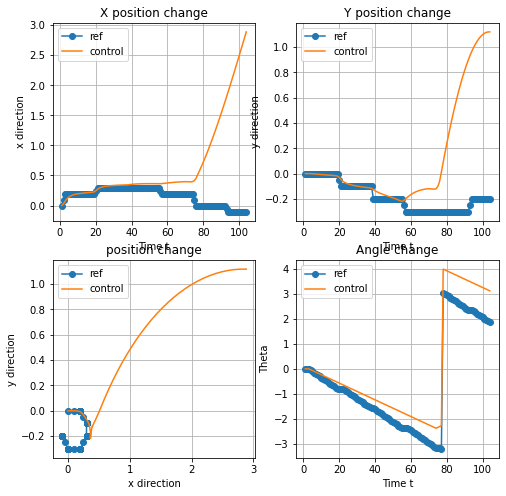

Point 104 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.80619449]
3.5878866090306443 [-0.1        -0.2         1.80619449] [2.98596459 1.11528955 3.07889487] [-1.4998973  -0.49999878]


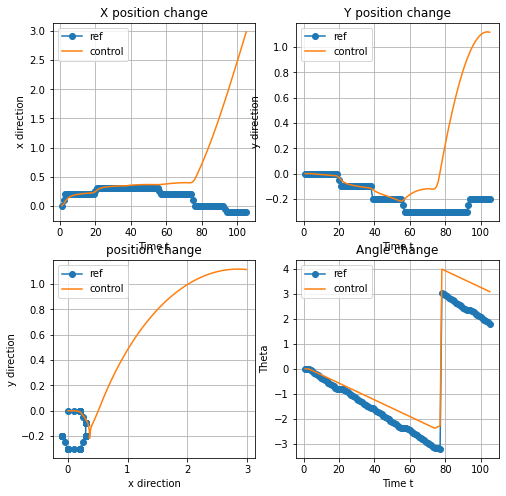

Point 105 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.75619449]
3.6776472856922098 [-0.1        -0.2         1.75619449] [3.08576167 1.10902428 3.04556162] [-1.49990325 -0.49999886]


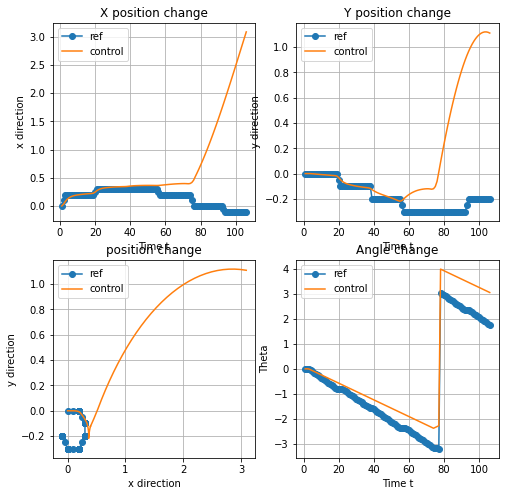

Point 106 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.70619449]
3.7666217395879875 [-0.1        -0.2         1.70619449] [3.18529761 1.09943625 3.01222832] [-1.49995007 -0.4999994 ]


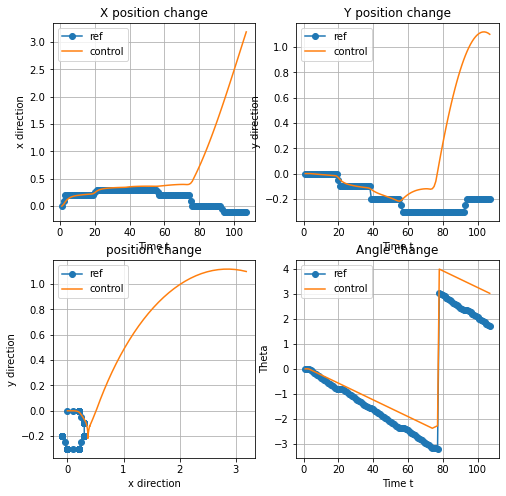

Point 107 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.65619449]
3.8547731819253426 [-0.1        -0.2         1.65619449] [3.2844592  1.08653623 2.97889502] [-1.49995739 -0.49999949]


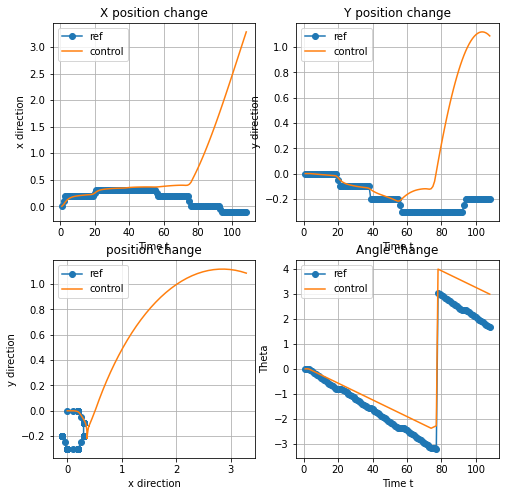

Point 108 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.60619449]
3.94206813032589 [-0.1        -0.2         1.60619449] [3.38313601 1.07033858 2.94556172] [-1.4999607  -0.49999953]


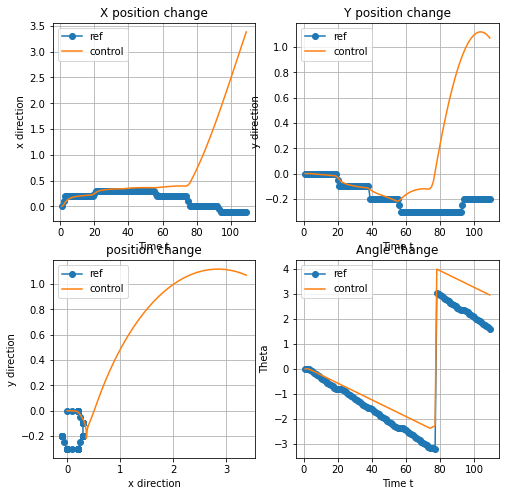

Point 109 ,Step 1 - MSE error in lifted space, ref, state x, input u:
[-0.1        -0.2         1.57079633]
4.023582337134518 [-0.1        -0.2         1.57079633] [3.48121774 1.05086139 2.91222842] [-1.49995405 -0.49999945]


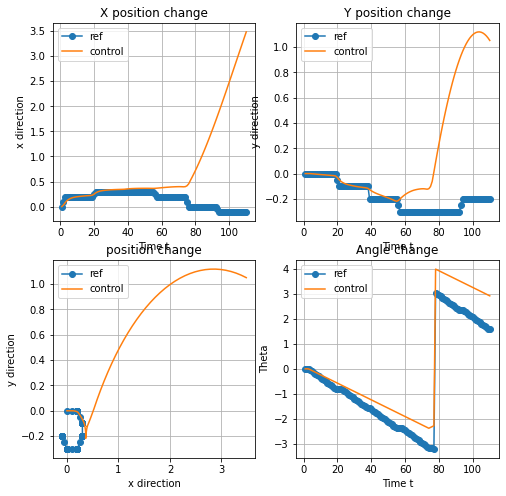

In [ ]:
# get augmented matrices
model_file = 'newnew_real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
Q = 1000*np.diag(np.array([1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 0.1*np.diag(np.array([2.,1.]))
rho = 0.01
# Np = 6
Nc = 5
thre = 10
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
u_init = np.array([0.,0.])#1.5*10*np.pi/SimLength,-10*np.pi/SimLength])
t1 = time.perf_counter()
file_name = MPC_control_process(model_file,path_ref,u_init,x_init,Q,R,rho,Nc,thre)
t2 = time.perf_counter()
print("Total time needed is "+str(1000*(t2-t1))+" ms.")

In [ ]:
control_files = [file_name]
ref_file = 'SimLenth_200_Ts_0.1'
MPC_result_plot(ref_file,control_files,Nc)

./dataset/MPC/SimLenth_20_Ts_0.1
[[-18.28336502 -17.02355425   0.76193182  19.66763815   2.40987237
   -0.08180101   6.86120258  -3.64070084   0.43556475  -2.14903979
   -0.12943847]
 [-12.6374305   12.04728029   5.52862112   1.82066335  10.76715773
   -0.10241866   2.0307359   -6.04509355   0.60264377 -10.69322042
    0.76075792]]
Point 1 ,Step 1 - MSE error in lifted space,state x, input u:
[0.1 0.  0. ]
0.25495097567963926 [-0.15  0.   -0.05] [-1.5 -0.5]


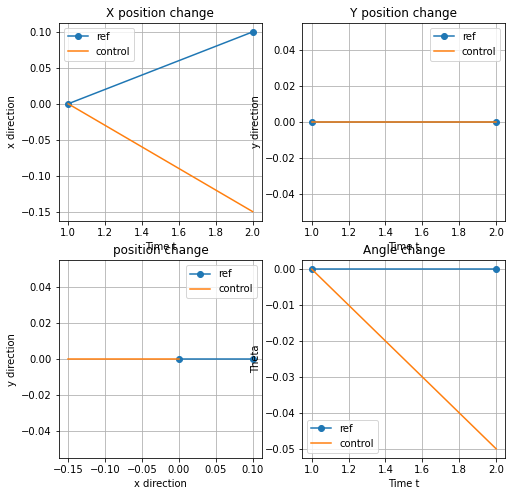

Point 2 ,Step 1 - MSE error in lifted space,state x, input u:
[0.2 0.  0. ]
0.50977326071644 [-0.29981254  0.00749688 -0.1       ] [-1.5 -0.5]


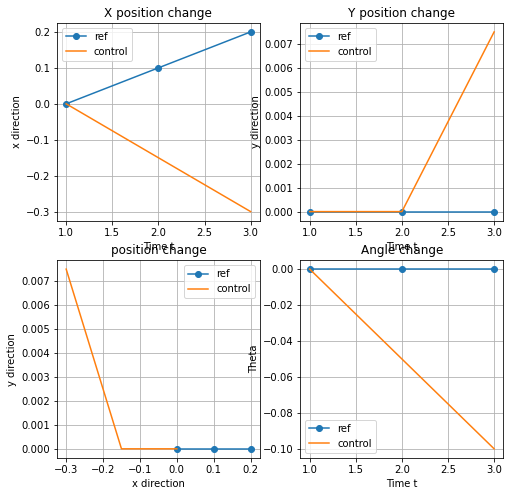

Point 3 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0. ]
0.7642647507138005 [-0.44906316  0.02247189 -0.15      ] [-1.5 -0.5]


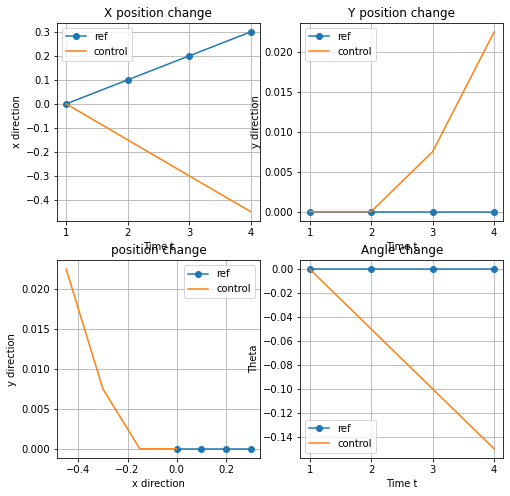

Point 4 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.05]
0.932632646790942 [-0.59737883  0.04488761 -0.2       ] [-1.5 -0.5]


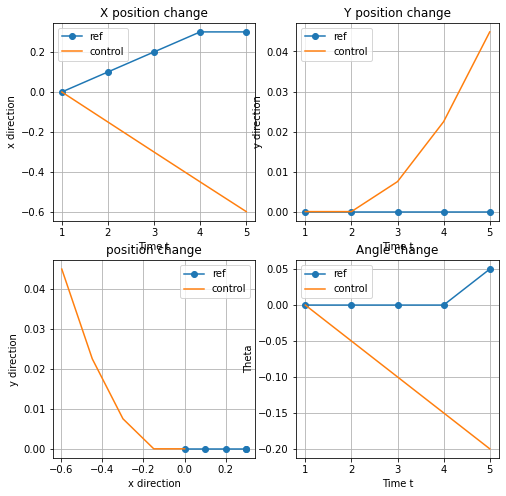

Point 5 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0.1]
1.1040046601039564 [-0.74438881  0.07468801 -0.25      ] [-1.5 -0.5]


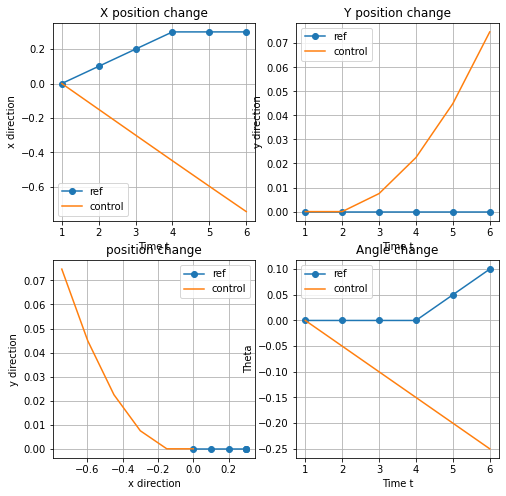

Point 6 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.15]
1.2768892317376055 [-0.88972568  0.1117986  -0.3       ] [-1.5 -0.5]


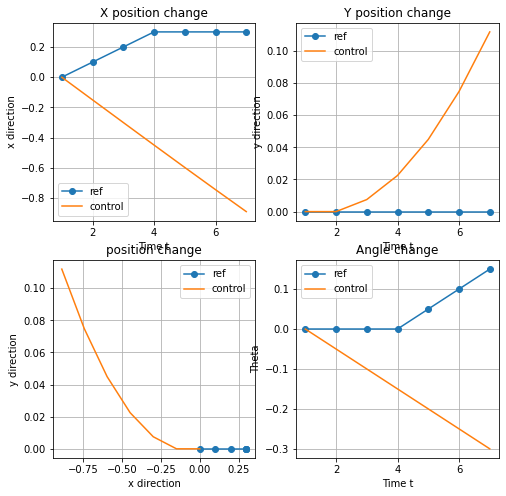

Point 7 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0.2]
1.4504600093769047 [-1.03302615  0.15612663 -0.35      ] [-1.5 -0.5]


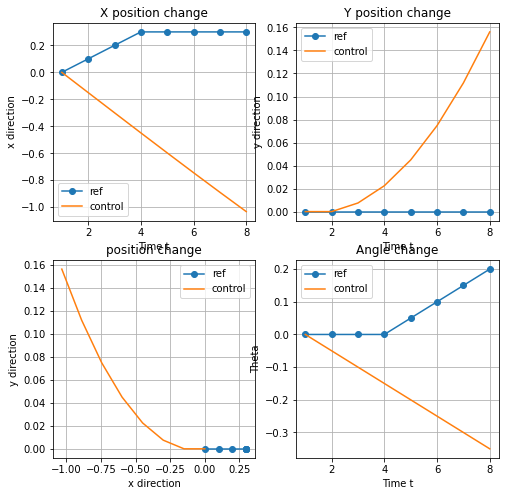

Point 8 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.25]
1.6242097769958597 [-1.17393206  0.2075613  -0.4       ] [-1.5 -0.5]


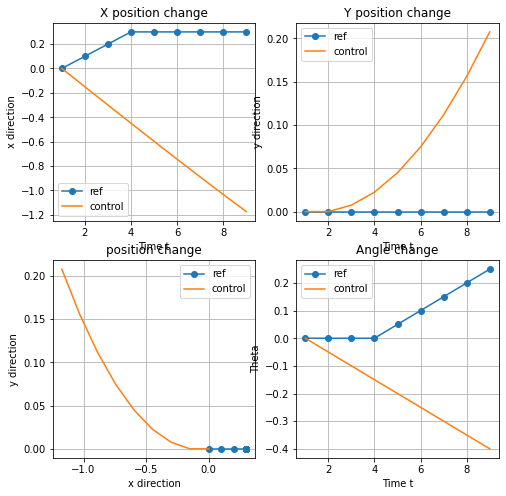

Point 9 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0.3]
1.7977987236090573 [-1.3120912   0.26597405 -0.45      ] [-1.5 -0.5]


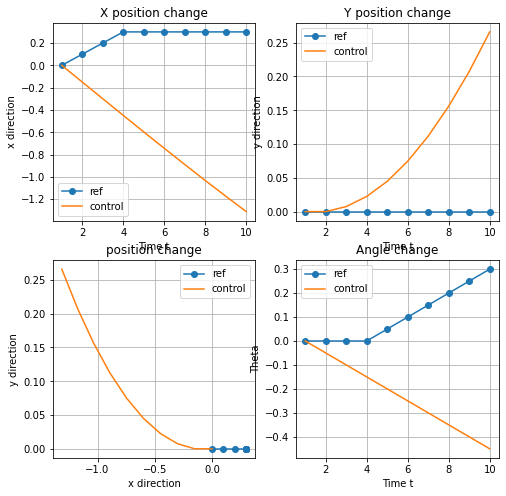

Point 10 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.35]
1.9709814740096172 [-1.44715827  0.33121888 -0.5       ] [-1.5 -0.5]


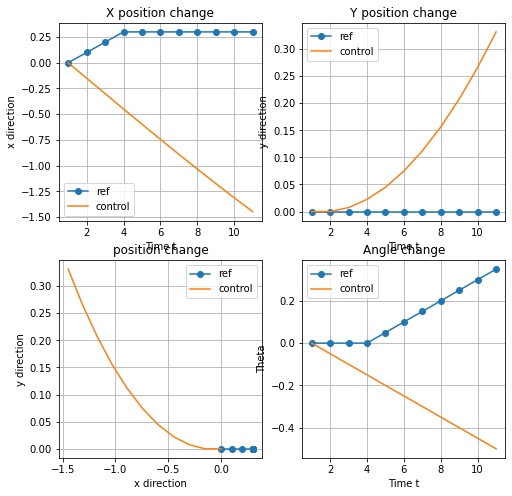

Point 11 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0.4]
2.14356924259781 [-1.57879565  0.40313272 -0.55      ] [-1.5 -0.5]


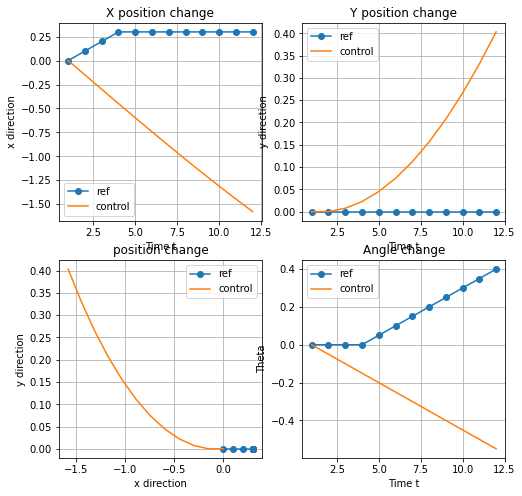

Point 12 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.45]
2.315408949762757 [-1.70667433  0.4815358  -0.6       ] [-1.5 -0.5]


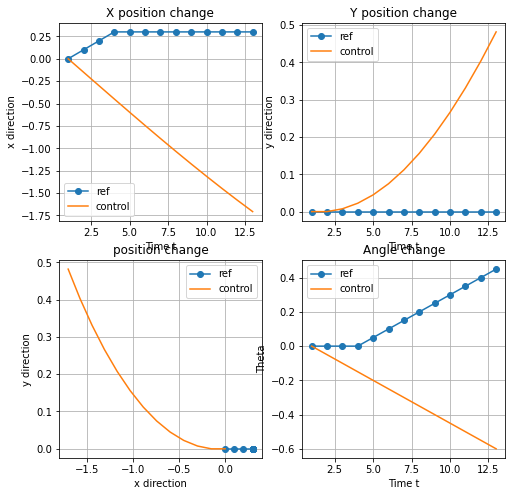

Point 13 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0.5]
2.4863710930790384 [-1.83047468  0.56623217 -0.65      ] [-1.5 -0.5]


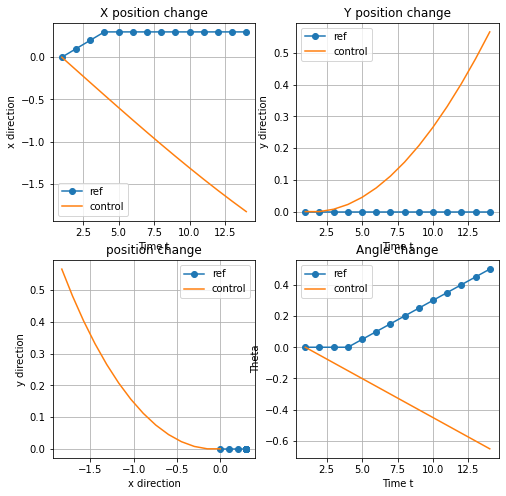

Point 14 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.55]
2.656342396570684 [-1.94988724  0.65701013 -0.7       ] [-1.5 -0.5]


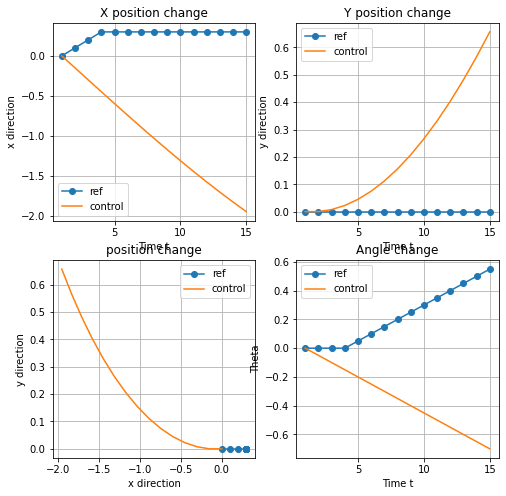

Point 15 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0.6]
2.8252211942700525 [-2.06461357  0.75364278 -0.75      ] [-1.5 -0.5]


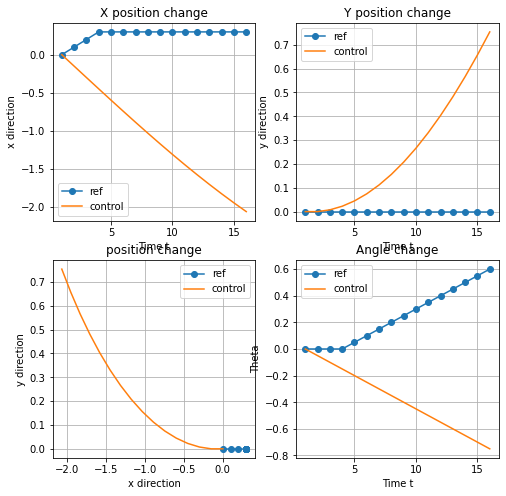

Point 16 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.65]
2.9929144434361774 [-2.1743669  0.8558886 -0.8      ] [-1.5 -0.5]


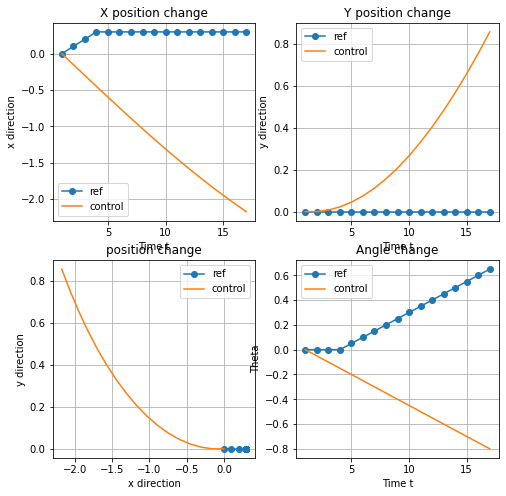

Point 17 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3 0.  0.7]
3.1593357438658347 [-2.27887291  0.96349201 -0.85      ] [-1.5 -0.5]


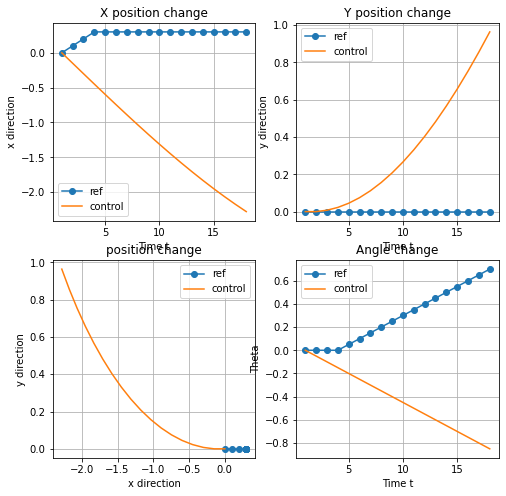

Point 18 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3  0.   0.75]
3.324403997720632 [-2.37787038  1.07618407 -0.9       ] [-1.5 -0.5]


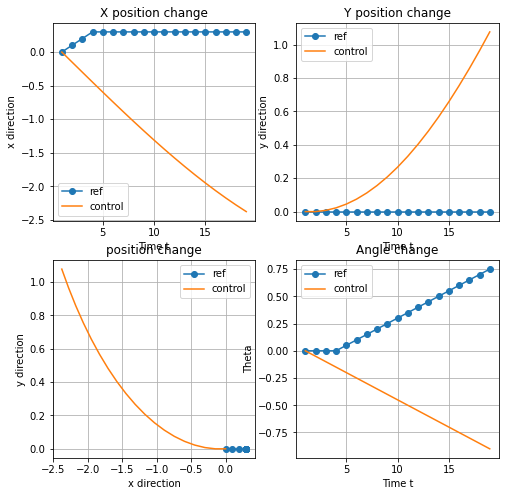

Point 19 ,Step 1 - MSE error in lifted space,state x, input u:
[0.3        0.         0.78539816]
3.4807394596211427 [-2.47111188  1.19368311 -0.95      ] [-1.5 -0.5]


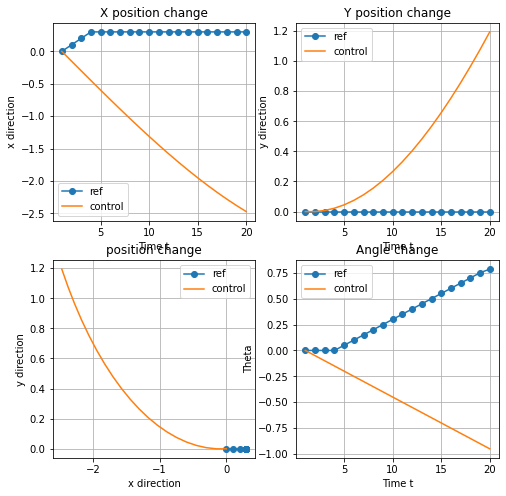

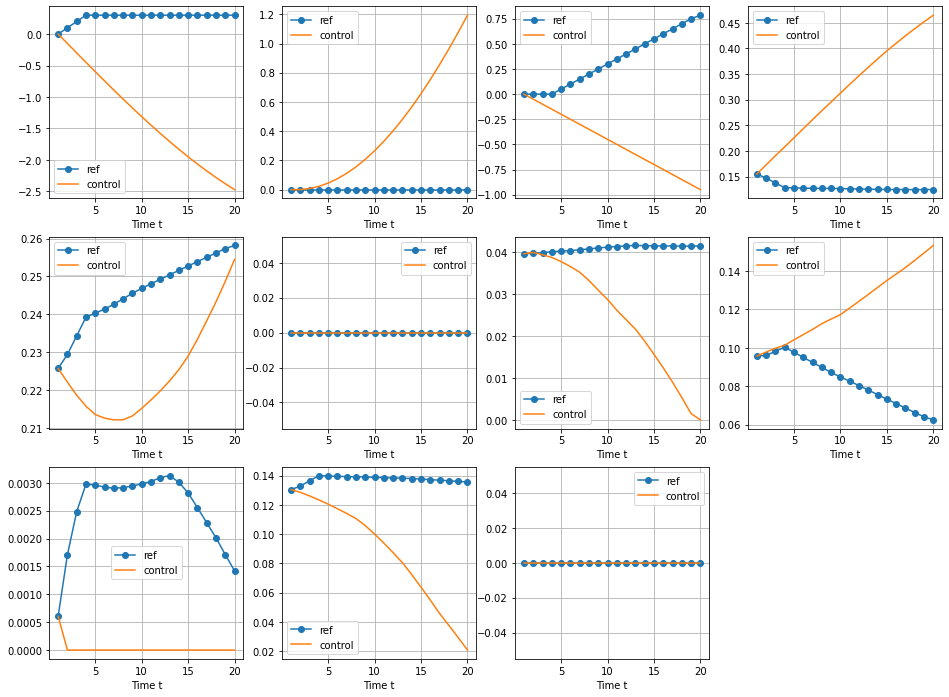

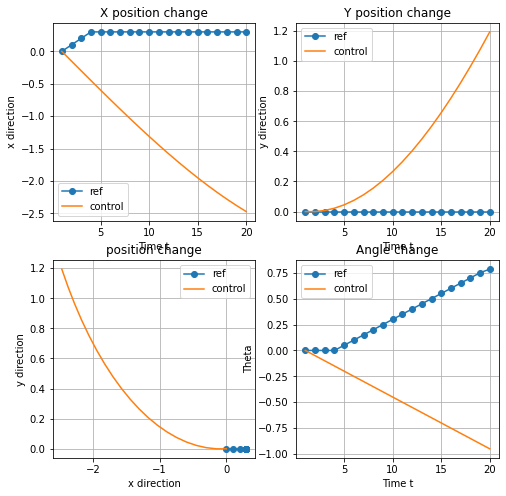

Average time needed per step is 0.0320105263151498 ms.
MSE loss: 4.488450613668968
Controled path file: Q-[1000. 1000.  100.  100.  100.  100.  100.  100.  100.  100.  100.]_R-[2. 1.]


'Q-[1000. 1000.  100.  100.  100.  100.  100.  100.  100.  100.  100.]_R-[2. 1.]'

In [4]:
from LQR import *
from numpy import pi
import numpy as np
SimLength = 20
init_x = np.array([0.,0.,0.])
path=simulate_path(init_x,SimLength)
model_file = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
ref = np.load(path+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
Q = 100*np.diag(np.array([10.,10.,1.,1.,1.,1.,1.,1.,1.,1.,1.]))
R = 1*np.diag(np.array([2.,1.]))
thre = 10
LQR_control_process(model_file,path_ref,x_init,Q,R,thre)

In [58]:
(np.ones((1,5))-np.tri(1,5,0))[0]

array([0., 1., 1., 1., 1.])

In [1]:
import numpy as np
from Koopman_numpy import Koopman_numpy
from MPC import *

SimLength = 8
init_x = np.array([0.,0.,0.])
file=simulate_path(init_x,SimLength)
ref = np.load(file+".npy",allow_pickle=True).item()
path_ref = ref['path']
x_init = ref['init state']
diff = path_ref[:,1:]-path_ref[:,:-1]
angle = np.arctan2(diff[1,:],diff[0,:])
path_ref = np.r_[path_ref,np.c_[x_init[2],np.array([angle])]]

./dataset/MPC/SimLenth_8_Ts_0.1


In [2]:
file_name = 'encoder_[3, 32, 64, 6]_decoder_[9, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((9,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/lower_complex/ref_4',lifted_ref)


file_name = 'encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 11]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/complex/ref_4',lifted_ref)


file_name = 'unmasked_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/unmasked/ref_4',lifted_ref)


file_name = 'real_encoder_[3, 32, 64, 8]_decoder_[11, 128, 64, 32, 3]_hyper_[1.0, 3.0, 0.3, 1e-07, 1e-07, 1e-07, 10]_batch_10'
operater = Koopman_numpy(file_name)
lifted_ref = np.zeros((11,path_ref.shape[1]))
for i in range(path_ref.shape[1]):
    lifted_ref[:,i] = operater.encode(path_ref[:,i])
np.save('./matlab/diagonal/ref_4',lifted_ref)

In [5]:
import numpy as np
ref = np.random.rand(3,2)
print(ref)
temp = np.zeros((3,0))
temp = np.c_[temp,ref[:,0]]
for i in range(1,ref.shape[1]):
    if ref[2,i]!=ref[2,i-1]:
        temp = np.c_[temp,[ref[0,i-1],ref[1,i-1],ref[2,i]]]
    temp = np.c_[temp,ref[:,i]]
ref = temp
print(ref)

[[0.28692786 0.97332439]
 [0.67600449 0.65400753]
 [0.34575353 0.95594089]]
[[0.28692786 0.28692786 0.97332439]
 [0.67600449 0.67600449 0.65400753]
 [0.34575353 0.95594089 0.95594089]]


In [5]:
u_max = np.array([1.5,0.5])
u_range = np.eye(2)
for i in range(1,5):
    u_range = np.c_[u_range,np.eye(2)]
print(u_max@u_range)

[1.5 0.5 1.5 0.5 1.5 0.5 1.5 0.5 1.5 0.5]
